<a href="https://colab.research.google.com/github/Pooja-2709/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1**   - Pooja Rathore

# **Project Summary -**

The main objective of this project was to employ machine learning techniques for predicting the 10-year risk of future coronary heart disease (CHD) in patients using data obtained from an ongoing cardiovascular study in Framingham, Massachusetts. The dataset contained information on more than 4,000 patients and encompassed 15 attributes, representing potential risk factors associated with CHD, including demographic, behavioral, and medical variables.

To prepare the data for analysis, extensive preprocessing was conducted, involving data cleaning and transformation. Missing values were addressed using techniques like median, mode, and KNN imputation, while outlier detection and removal were performed using the Interquartile Range (IQR) method. Additionally, log and square root transformations were applied to skewed continuous variables to reduce skewness and improve model performance.

For feature selection, variance inflation factor was employed to tackle multicollinearity, and a new feature named "pulse pressure" was engineered to capture the relationship between systolic and diastolic blood pressure. Redundant columns were also eliminated to streamline the dataset. The most significant features for predicting CHD risk were identified as 'age,' 'sex,' 'education,' 'cigs_per_day,' 'bp_meds,' 'prevalent_stroke,' 'prevalent_hyp,' 'diabetes,' 'total_cholesterol,' 'bmi,' 'heart_rate,' 'glucose,' and 'pulse_pressure.'

To address the class imbalance in the dataset, the SMOTE combined with Tomek links undersampling technique was applied to achieve a balanced class distribution and enhance model performance. Moreover, the data was standardized using the standard scalar method to bring all features to the same scale.

Multiple machine learning models were evaluated based on their recall performance, and after careful analysis, the Neural Network (tuned) was selected as the final prediction model due to its highest recall score among the models evaluated. The primary aim was to accurately identify as many patients with CHD risk as possible, even if it led to some false positives.

In conclusion, this project demonstrated the potential of machine learning techniques in accurately predicting CHD risk in patients using data from a cardiovascular study. By conducting thorough preprocessing, selecting relevant features, and choosing an appropriate model based on a relevant evaluation metric, the project achieved a positive business impact by accurately predicting CHD risk in patients.

# **GitHub Link -**

https://github.com/Pooja-2709/Cardiovascular_Risk_Prediction

# **Problem Statement**


The data for this study is derived from an ongoing cardiovascular investigation involving residents of Framingham, Massachusetts. The main objective is to classify and predict whether a patient carries a 10-year risk of developing coronary heart disease (CHD). The dataset comprises information from over 4,000 patients and encompasses 15 attributes, each representing potential risk factors. These attributes encompass demographic, behavioral, and medical aspects.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold
import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# #Connecting to the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
url = '/content/drive/MyDrive/Colab Notebooks/almabetter project 3/data_cardiovascular_risk.csv'
data = pd.read_csv(url)

### Dataset Loading

In [5]:
# View top 5 rows of the dataset
data.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [6]:
# View last 5 rows of the dataset
data.tail()


id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

In [7]:
# Drop the id column (not relevant)
data.drop(columns=['id'], inplace=True)

### Dataset Rows & Columns count

In [8]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  3390
Number of columns are:  16


### Dataset Information

In [9]:
# Checking information about the dataset using info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [10]:
# Checking duplicated rows count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Checking missing values/null values count for each column
data.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

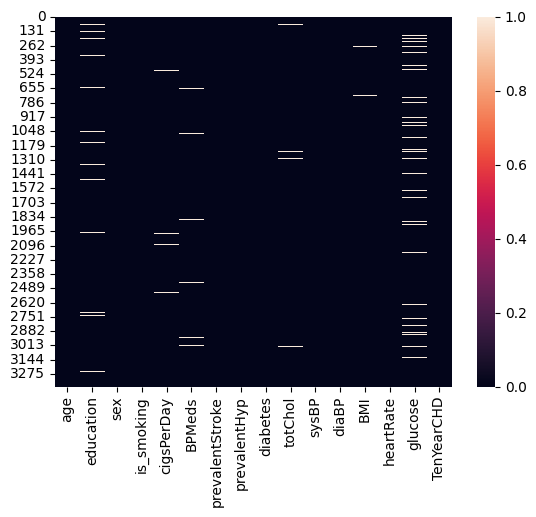

In [12]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=True)

### What did you know about your dataset?

There are 3390 numbers of observations(rows) and 16 columns are present in our data set

There are no duplicated rows

Dependent/Target Variable - Ten Year CHD

There are missing values present in the columns are education, cigs per day, BP meds, totChol, BMI, heart rate and glucose

## ***2. Understanding Your Variables***

In [13]:

# Dataset Columns
data.columns


Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2).transpose()

count unique  top  freq    mean    std    min    25%    50%  \
age              3390.0    NaN  NaN   NaN   49.54   8.59   32.0   42.0   49.0   
education        3303.0    NaN  NaN   NaN    1.97   1.02    1.0    1.0    2.0   
sex                3390      2    F  1923     NaN    NaN    NaN    NaN    NaN   
is_smoking         3390      2   NO  1703     NaN    NaN    NaN    NaN    NaN   
cigsPerDay       3368.0    NaN  NaN   NaN    9.07  11.88    0.0    0.0    0.0   
BPMeds           3346.0    NaN  NaN   NaN    0.03   0.17    0.0    0.0    0.0   
prevalentStroke  3390.0    NaN  NaN   NaN    0.01   0.08    0.0    0.0    0.0   
prevalentHyp     3390.0    NaN  NaN   NaN    0.32   0.46    0.0    0.0    0.0   
diabetes         3390.0    NaN  NaN   NaN    0.03   0.16    0.0    0.0    0.0   
totChol          3352.0    NaN  NaN   NaN  237.07  45.25  107.0  206.0  234.0   
sysBP            3390.0    NaN  NaN   NaN   132.6  22.29   83.5  117.0  128.5   
diaBP            3390.0    NaN  NaN   NaN   82.88  12.02   48.0   74.5   82.0   
BMI              3376.0    NaN  NaN   NaN   25.79   4.12  15.96  23.02  25.38   
heartRate        3389.0    NaN  NaN   NaN   75.98  11.97   45.0   68.0   75.0   
glucose          3086.0    NaN  NaN   NaN   82.09  24.24   40.0   71.0   78.0   
TenYearCHD       3390.0    NaN  NaN   NaN    0.15   0.36    0.0    0.0    0.0   

                   75%    max  
age               56.0   70.0  
education          3.0    4.0  
sex                NaN    NaN  
is_smoking         NaN    NaN  
cigsPerDay        20.0   70.0  
BPMeds             0.0    1.0  
prevalentStroke    0.0    1.0  
prevalentHyp       1.0    1.0  
diabetes           0.0    1.0  
totChol          264.0  696.0  
sysBP            144.0  295.0  
diaBP             90.0  142.5  
BMI              28.04   56.8  
heartRate         83.0  143.0  
glucose           87.0  394.0  
TenYearCHD         0.0    1.0

### Variables Description

**Demographic:**
 * Sex: male or female ("M" or "F")
 * Age: Age of the patient (Continuous - Although the recorded ages have been
     truncated to whole numbers, the concept of age is continuous)
 * Education: The level of education of the patient (categorical values - 1,2,3,4)


**Behavioral:**
 * is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
 * Cigs Per Day: the number of cigarettes that the person smoked on average in
      one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**

 * BP Meds: whether or not the patient was on blood pressure medication (Nominal)
 * Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
 * Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
 * Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
 * Tot Chol: total cholesterol level (Continuous)
 * Sys BP: systolic blood pressure (Continuous)
 * Dia BP: diastolic blood pressure (Continuous)
 * BMI: Body Mass Index (Continuous)
 * Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
 * Glucose: glucose level (Continuous)

**Predict variable (desired target):**
 * 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in age is 39
No. of unique values in education is 4
No. of unique values in sex is 2
No. of unique values in is_smoking is 2
No. of unique values in cigsPerDay is 32
No. of unique values in BPMeds is 2
No. of unique values in prevalentStroke is 2
No. of unique values in prevalentHyp is 2
No. of unique values in diabetes is 2
No. of unique values in totChol is 240
No. of unique values in sysBP is 226
No. of unique values in diaBP is 142
No. of unique values in BMI is 1259
No. of unique values in heartRate is 68
No. of unique values in glucose is 132
No. of unique values in TenYearCHD is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [17]:
# Renaming the columns
data_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [18]:

# Defining 3 lists containing the column names of
# This is defined based on the number of unique values for each attribute
dependent_var = ['ten_year_chd']

categorical_var = [i for i in data_2.columns if data_2[i].nunique()<=4]
continuous_var = [i for i in data_2.columns if i not in categorical_var]

In [19]:
categorical_var

['education',
 'sex',
 'is_smoking',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [20]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

### What all manipulations have you done and insights you found?

Changed the names of all the columns for ease of use.

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    2879
1     511
Name: ten_year_chd, dtype: int64
 


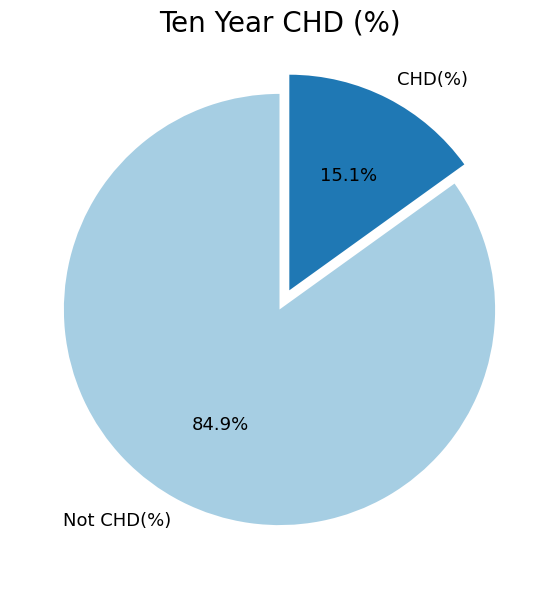

In [21]:
# Chart - 1 visualization code
# Distribution of dependent varaible - ten_year_chd


# Dependant Column Value Counts
print(data_2.ten_year_chd.value_counts())
print(" ")

#color palette selection
colors = sns.color_palette("Paired")

# plotting data on chart
plt.figure(figsize=(12,7))
explode = [0,0.1]
textprops = {'fontsize':13}
plt.pie(data_2['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=20)

# displaying chart
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that 15.1% that is 511 out of 3390 are classified as positive for 10 year CHD whereas the remaining 84.9% that is 2879 out of 3390 are classified as negative for 10 year CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the chart show that 15.1% of the population has a positive classification for 10-year CHD, while 84.9% have a negative classification. This information can help businesses in the healthcare industry develop targeted strategies. There are no specific insights in the chart that indicate negative growth, but failure to address high CHD prevalence could have negative implications for public health and healthcare businesses.

#### Chart - 2

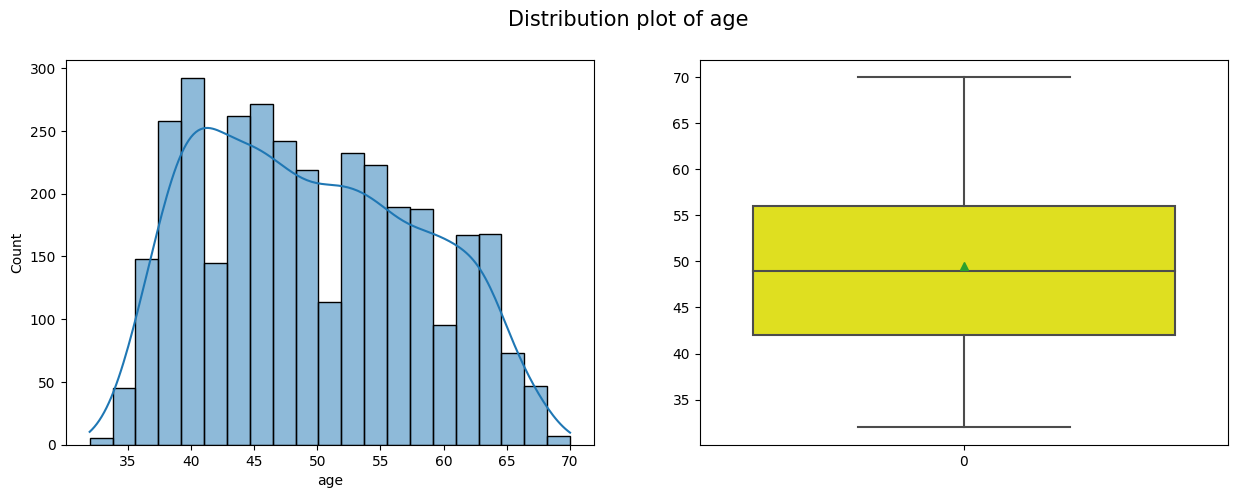

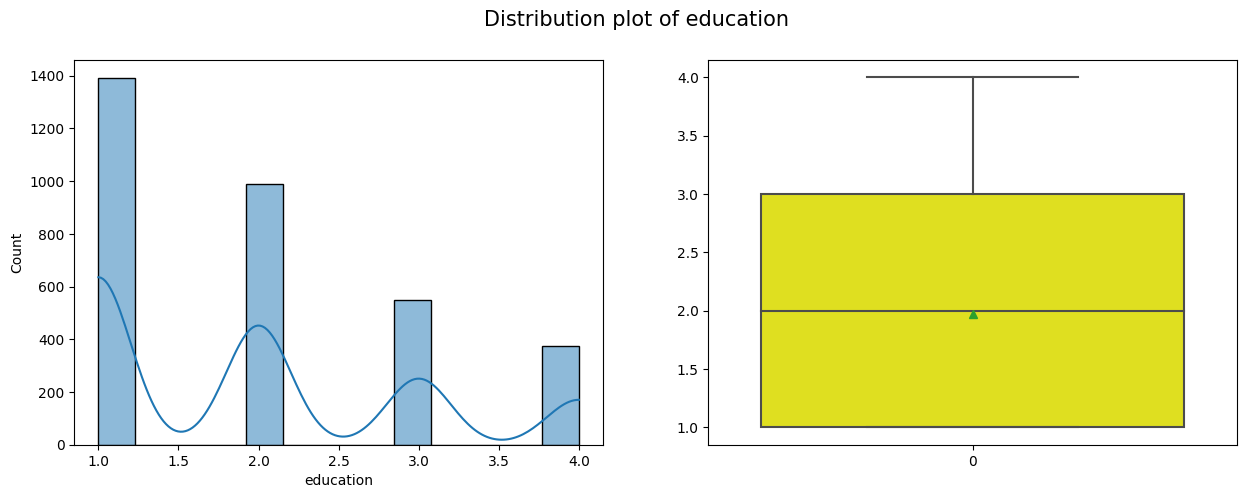

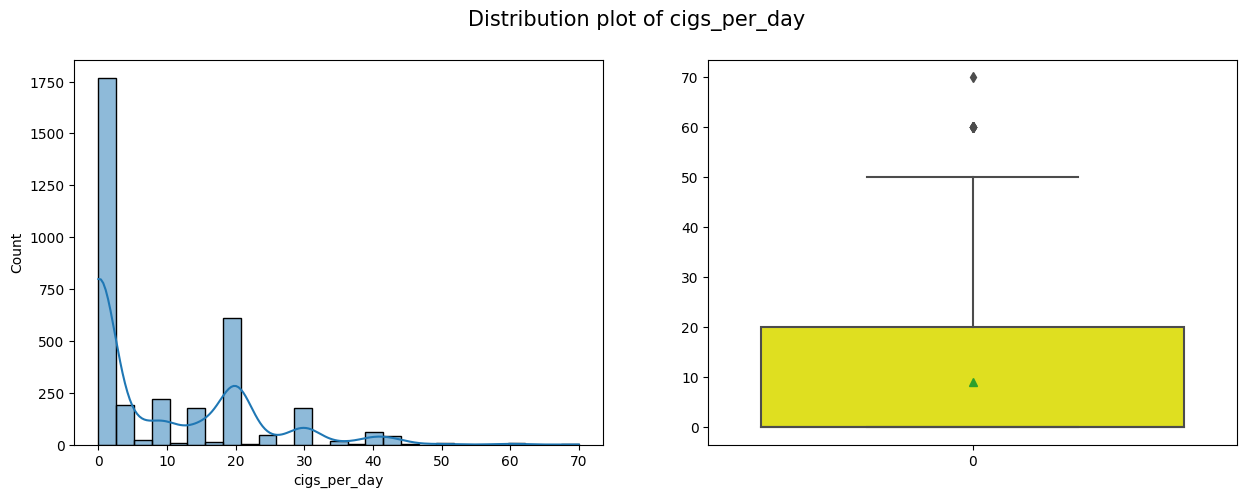

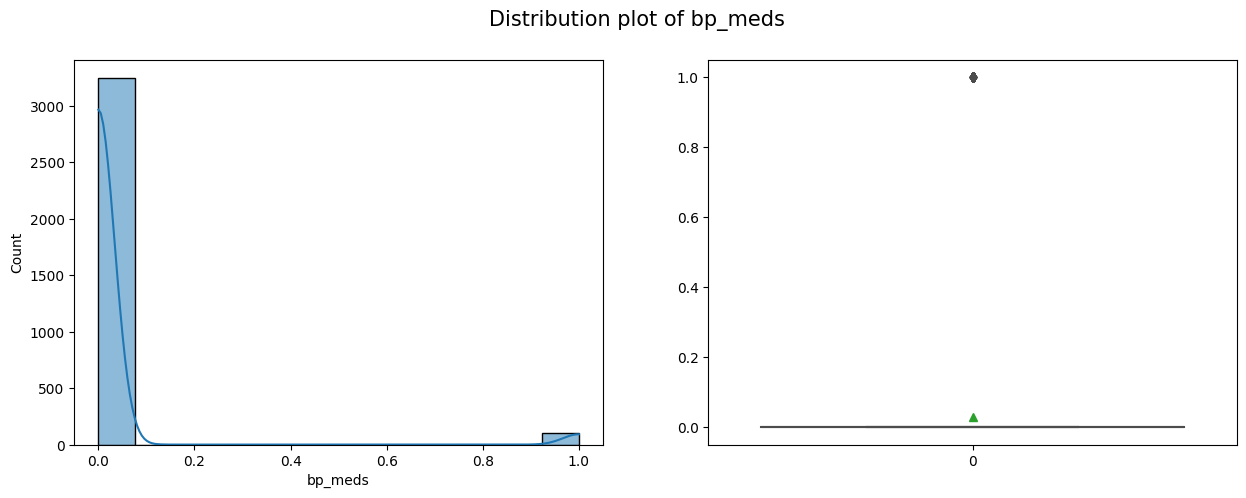

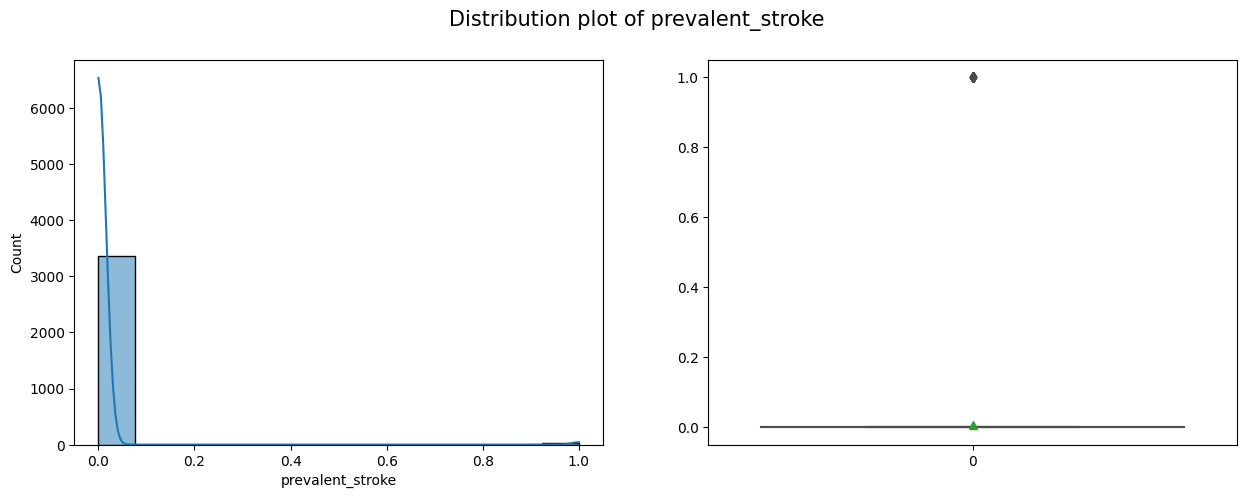

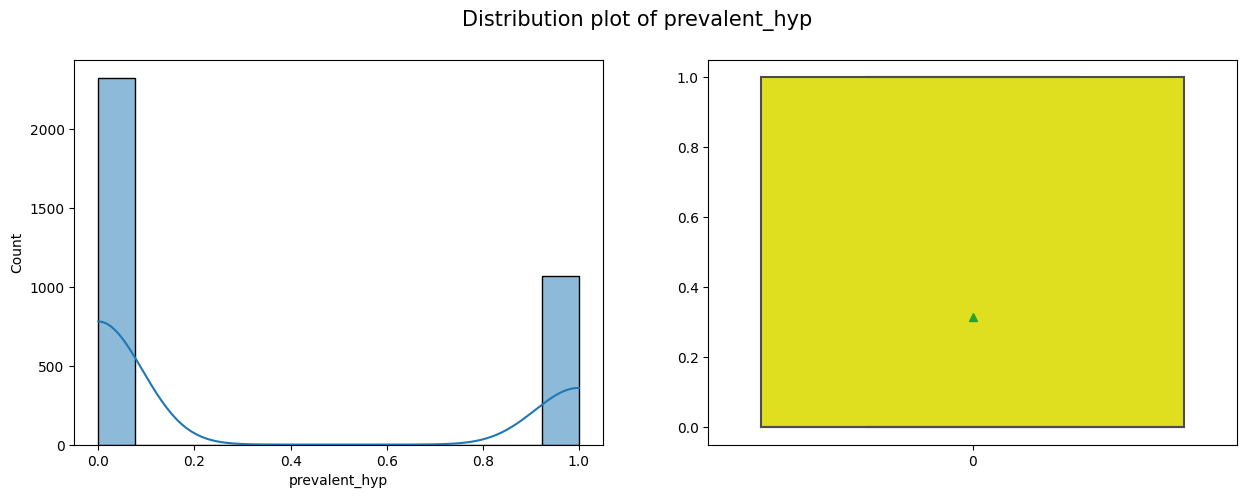

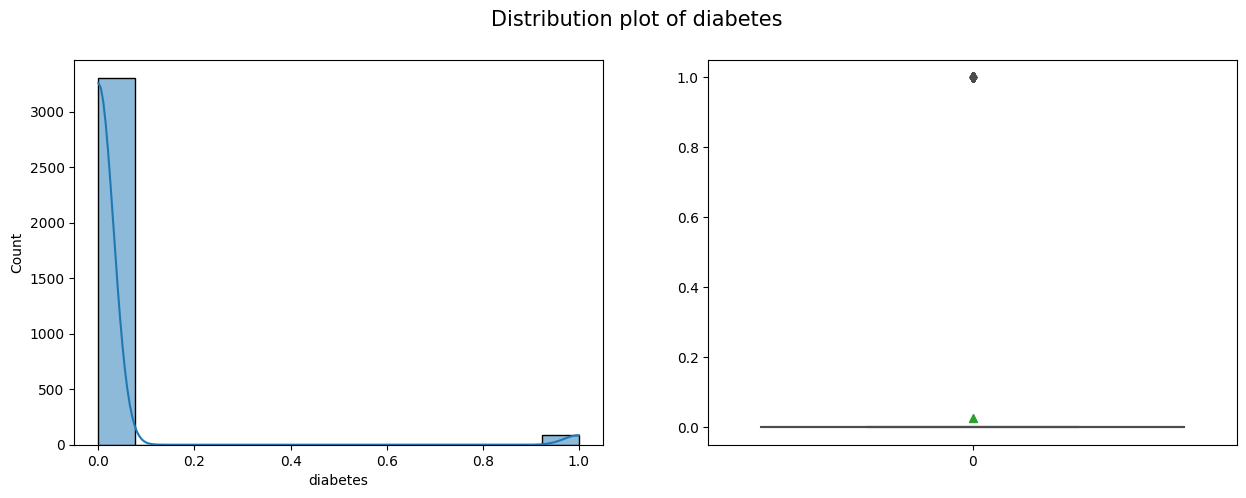

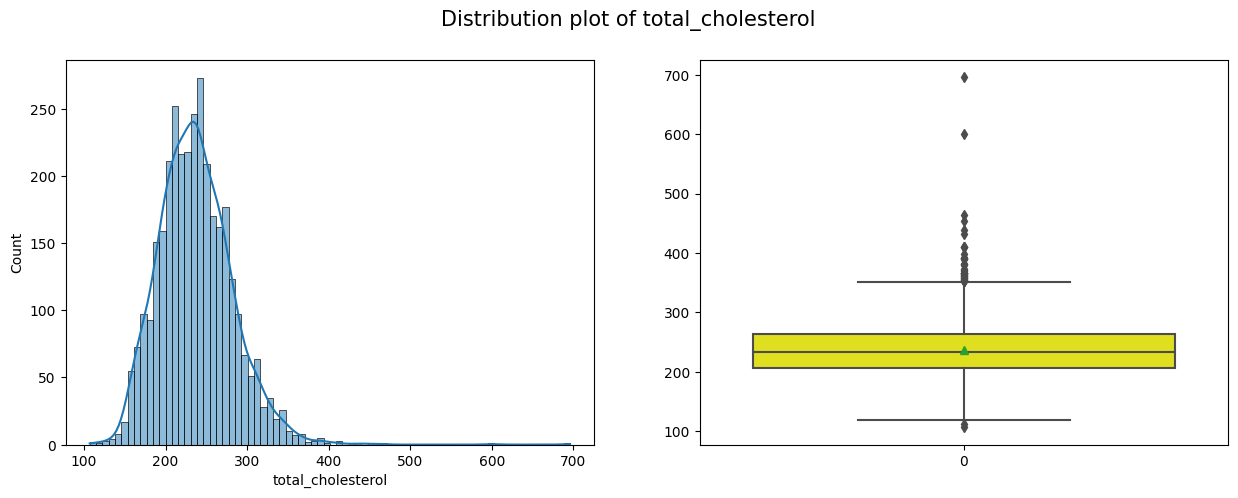

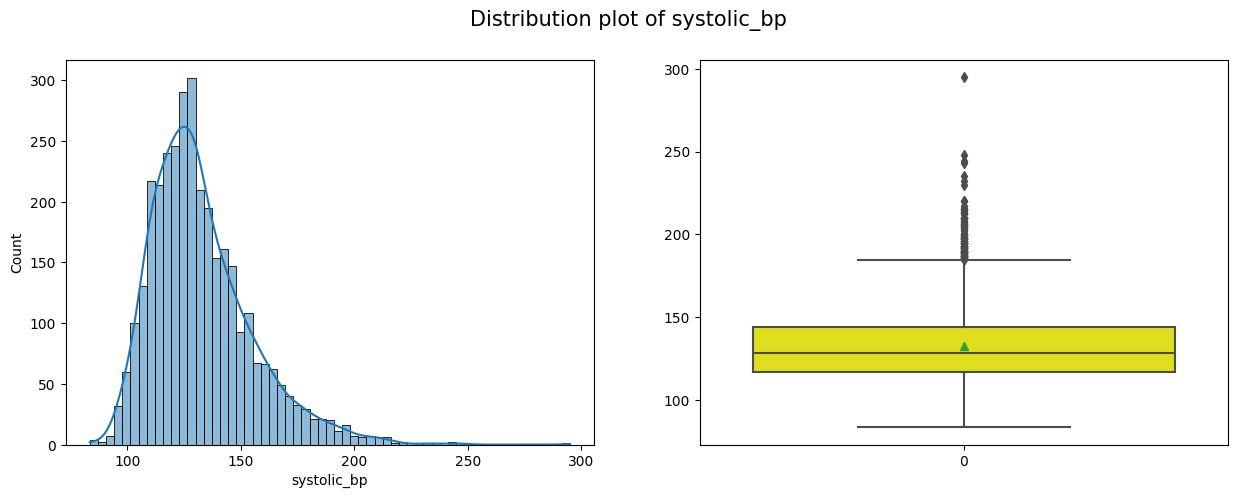

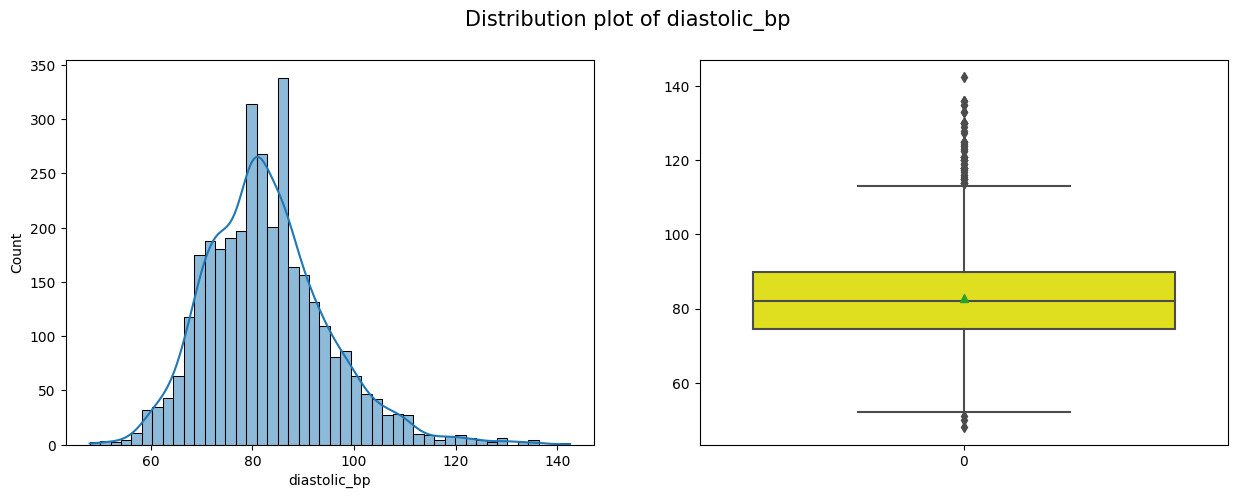

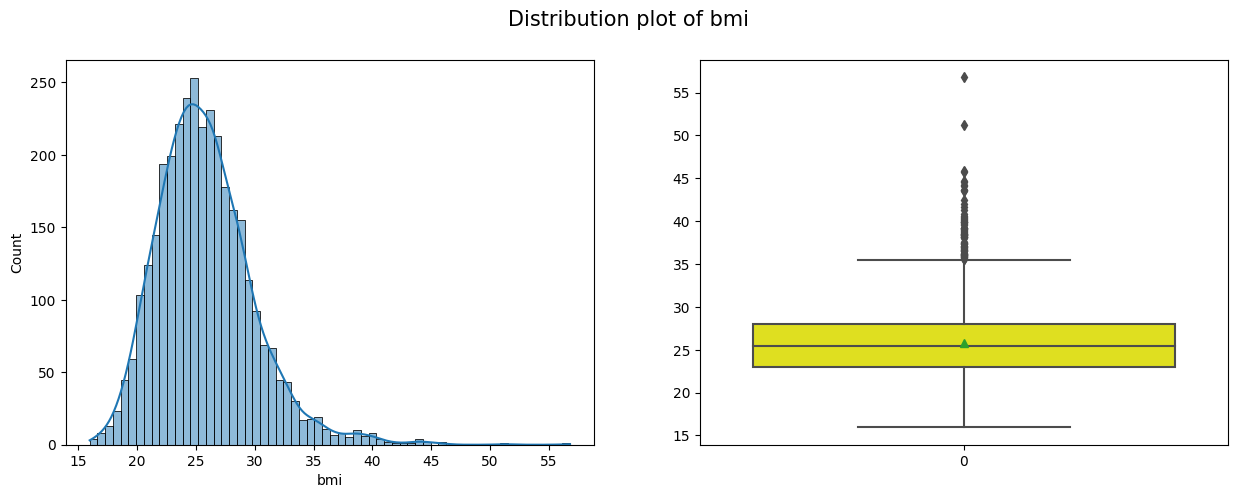

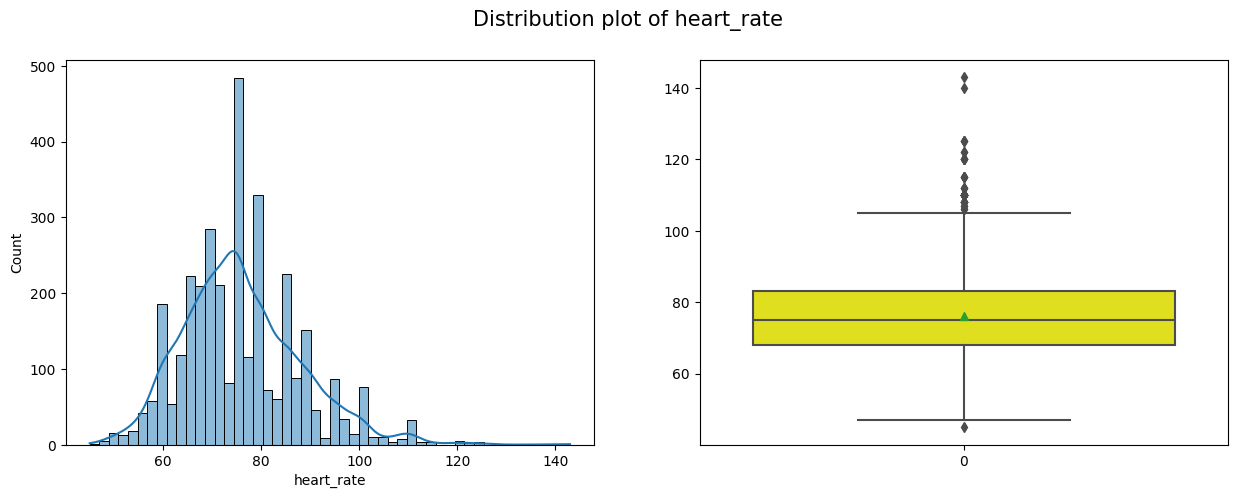

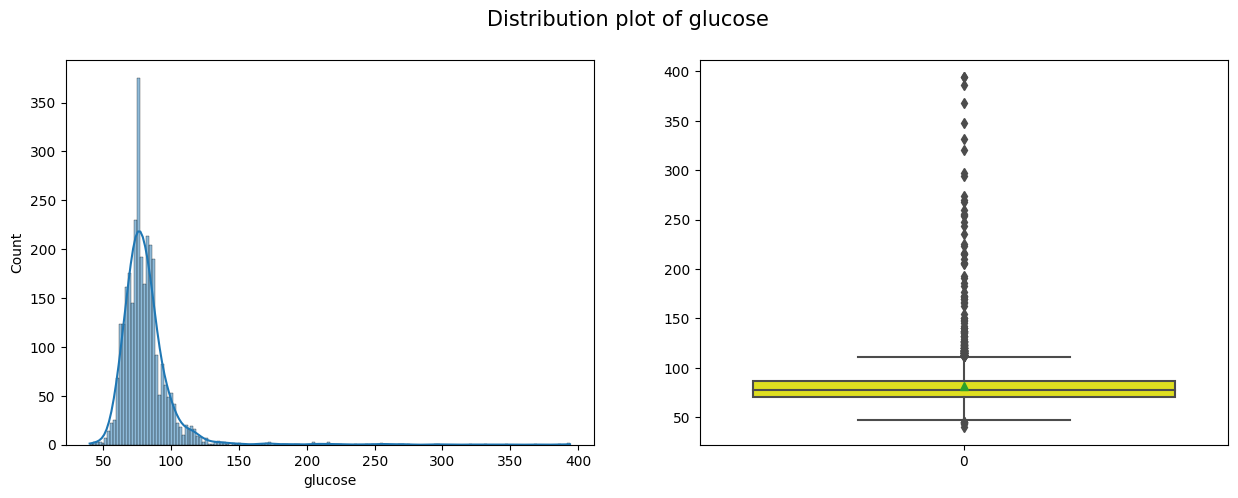

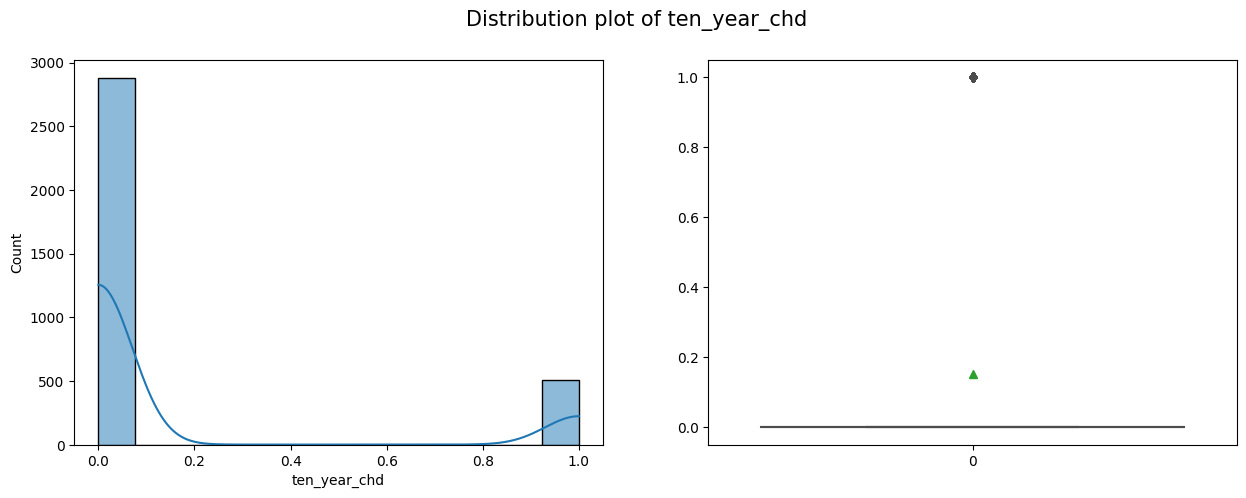

In [22]:
# Chart - 2 visualization code
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='v',showmeans=True,color='yellow')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, I used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value

##### 2. What is/are the insight(s) found from the chart?

From the distribution we see that most of the columns are normally distributed, some of them are skewed and we can see some of the categorical columns also. In the box plot, we see some outliers also which we will handle later before model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset and the outliers in the boxplot for the different continuous columns.

#### Chart - 3

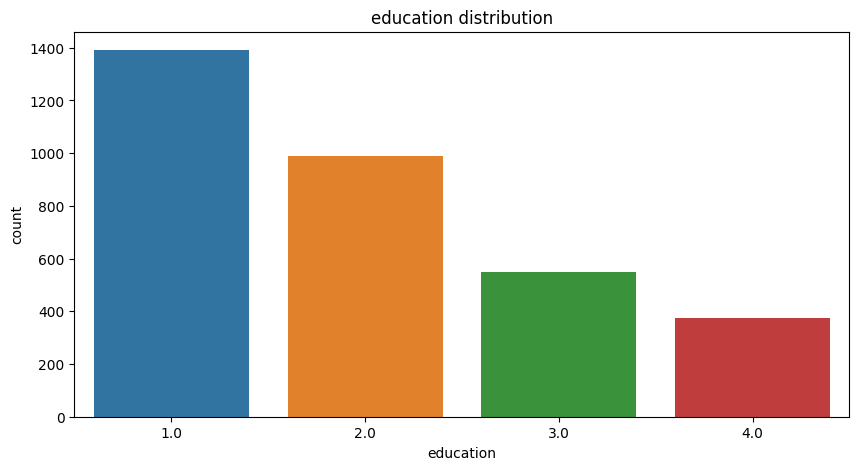

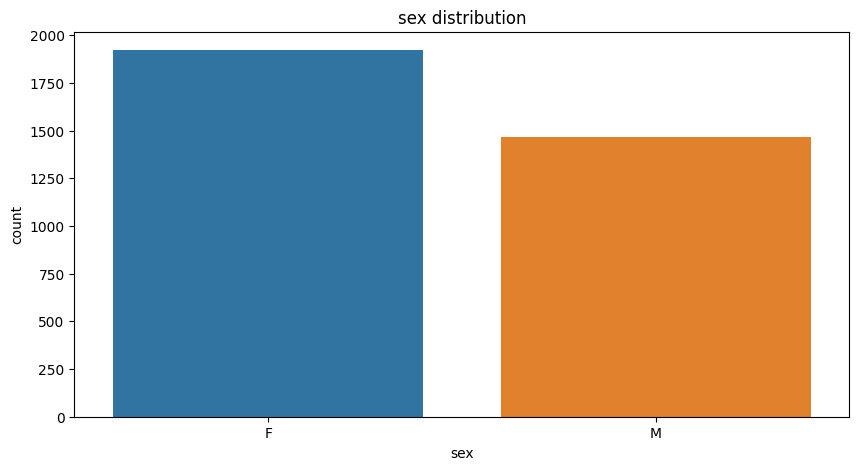

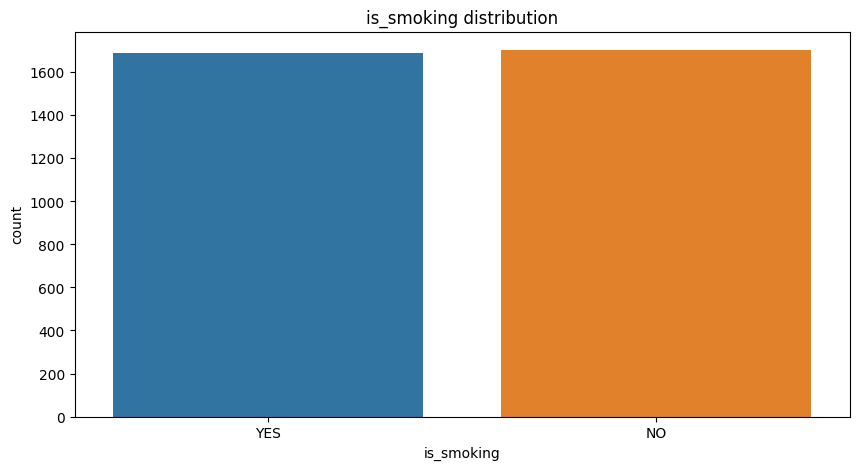

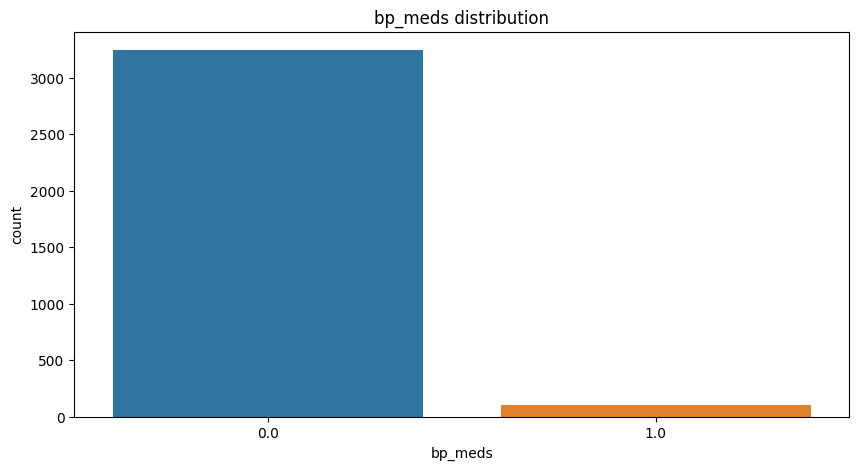

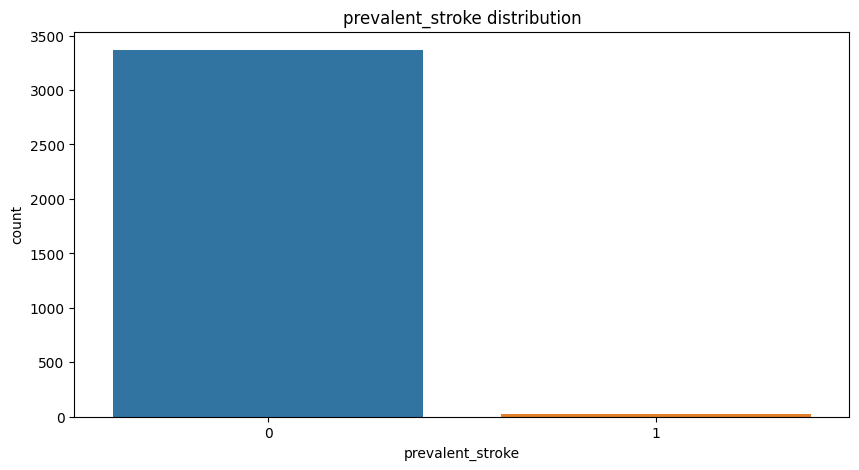

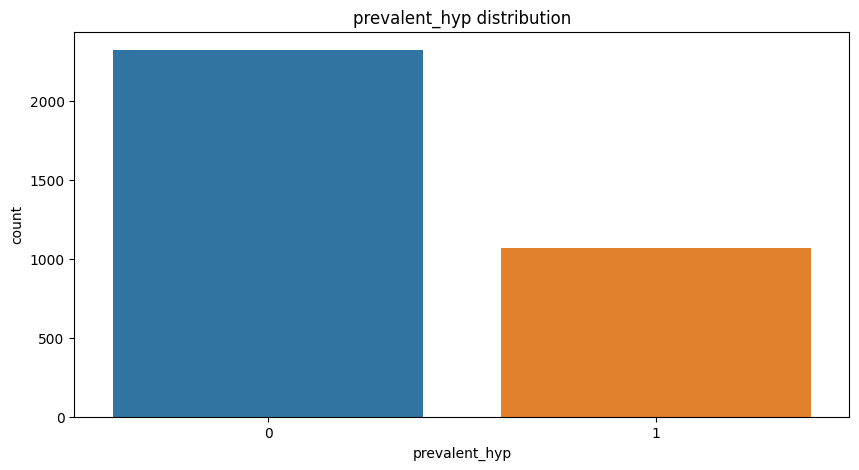

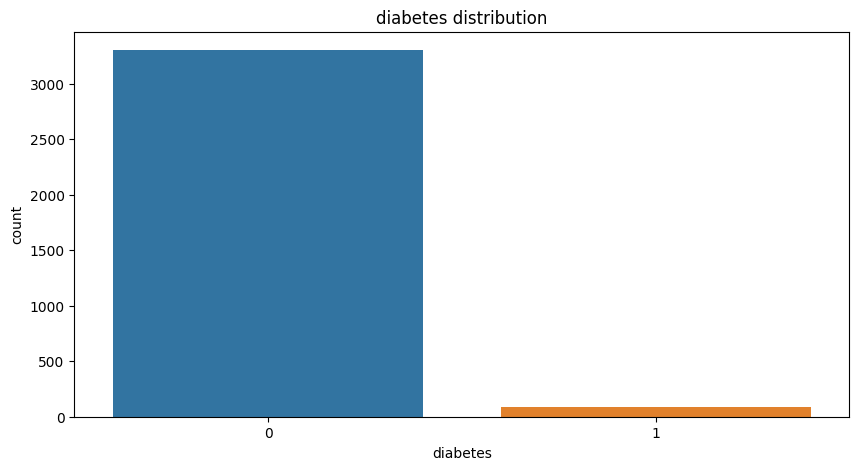

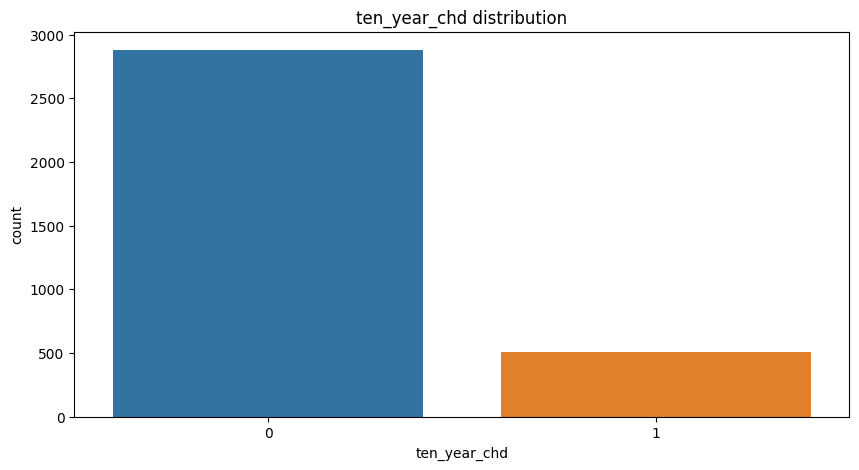

In [23]:
# Chart - 3 visualization code
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,5))
  p = sns.countplot(x=i, data = data_2)
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?


The distribution of different categories in the categorical columns can be seen. The education column has the highest for the 1 category followed by 2 3 and 4.

The gender distribution is not even with high count for females. The is_smoking column is even. Bp_meds, prevalent_stroke, prevalent_hyp and diabetes are imbalanced, they have very few counts for the positive cases.

Finaly the ten_year_chd is also imbalanced with few positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The information derived from the chart has the potential to generate a favorable business impact by offering valuable insights for decision-making. Analyzing the distribution of categories across different columns allows for the identification of patterns and enables targeting specific demographics or areas of focus. For instance, businesses can create tailored marketing campaigns based on gender distribution or design educational programs according to the education levels of the target audience. Moreover, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is essential to acknowledge that the chart alone does not present a comprehensive view of the business impact. The actual effect would rely on how effectively these insights are integrated into business strategies and actions. Factors like market demand, competition, and the efficacy of implemented strategies would also influence overall business growth. Therefore, while the acquired insights have the potential to yield positive business outcomes, their actual realization would necessitate further analysis and strategic implementation.








#### Chart - 4

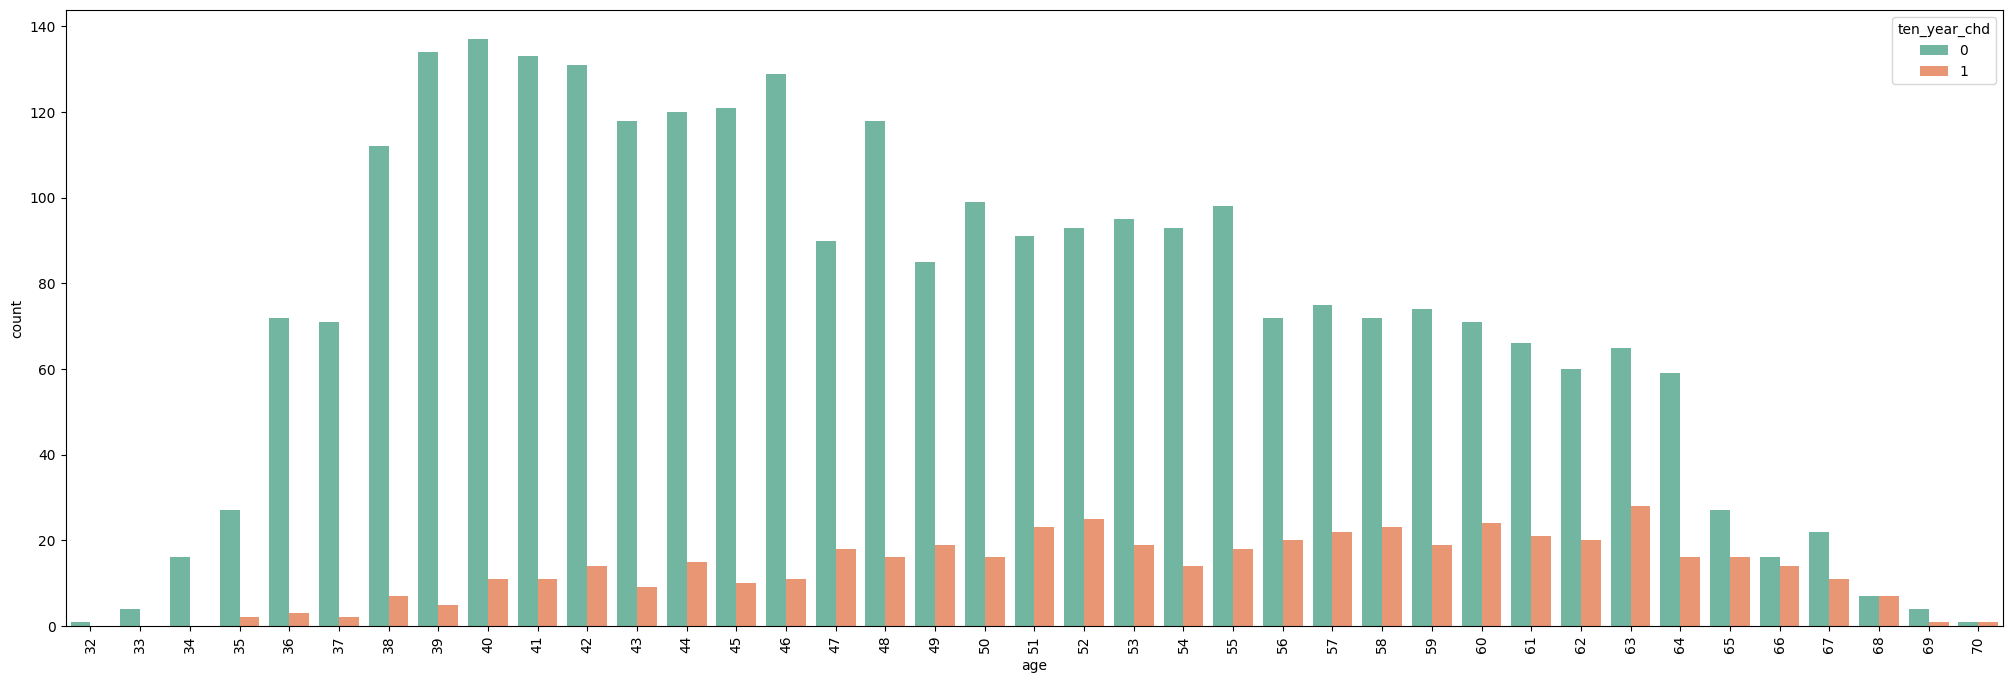

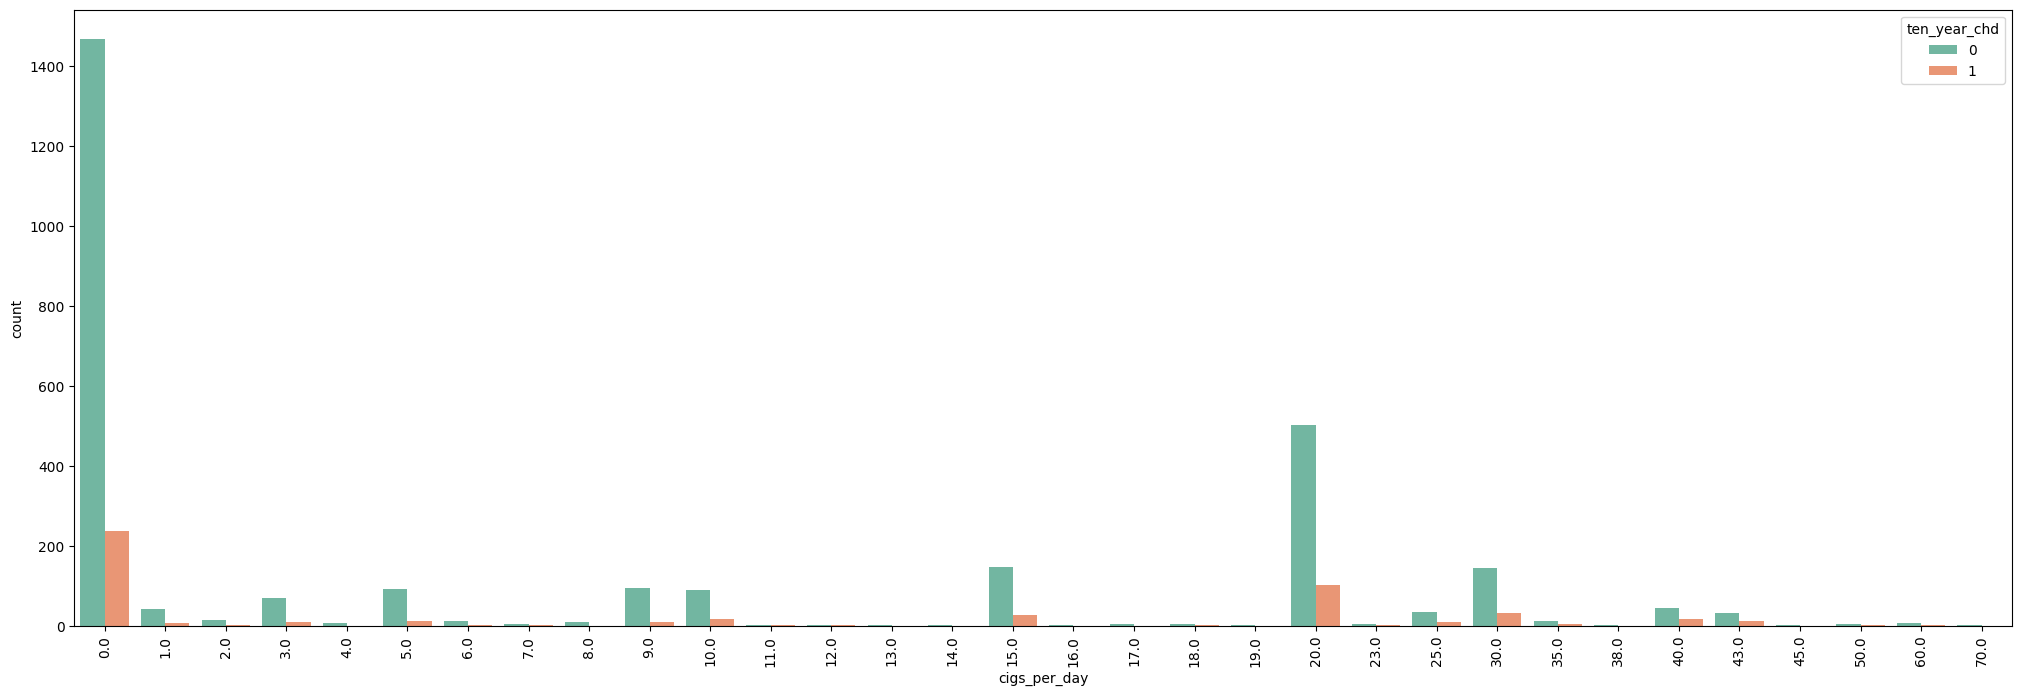

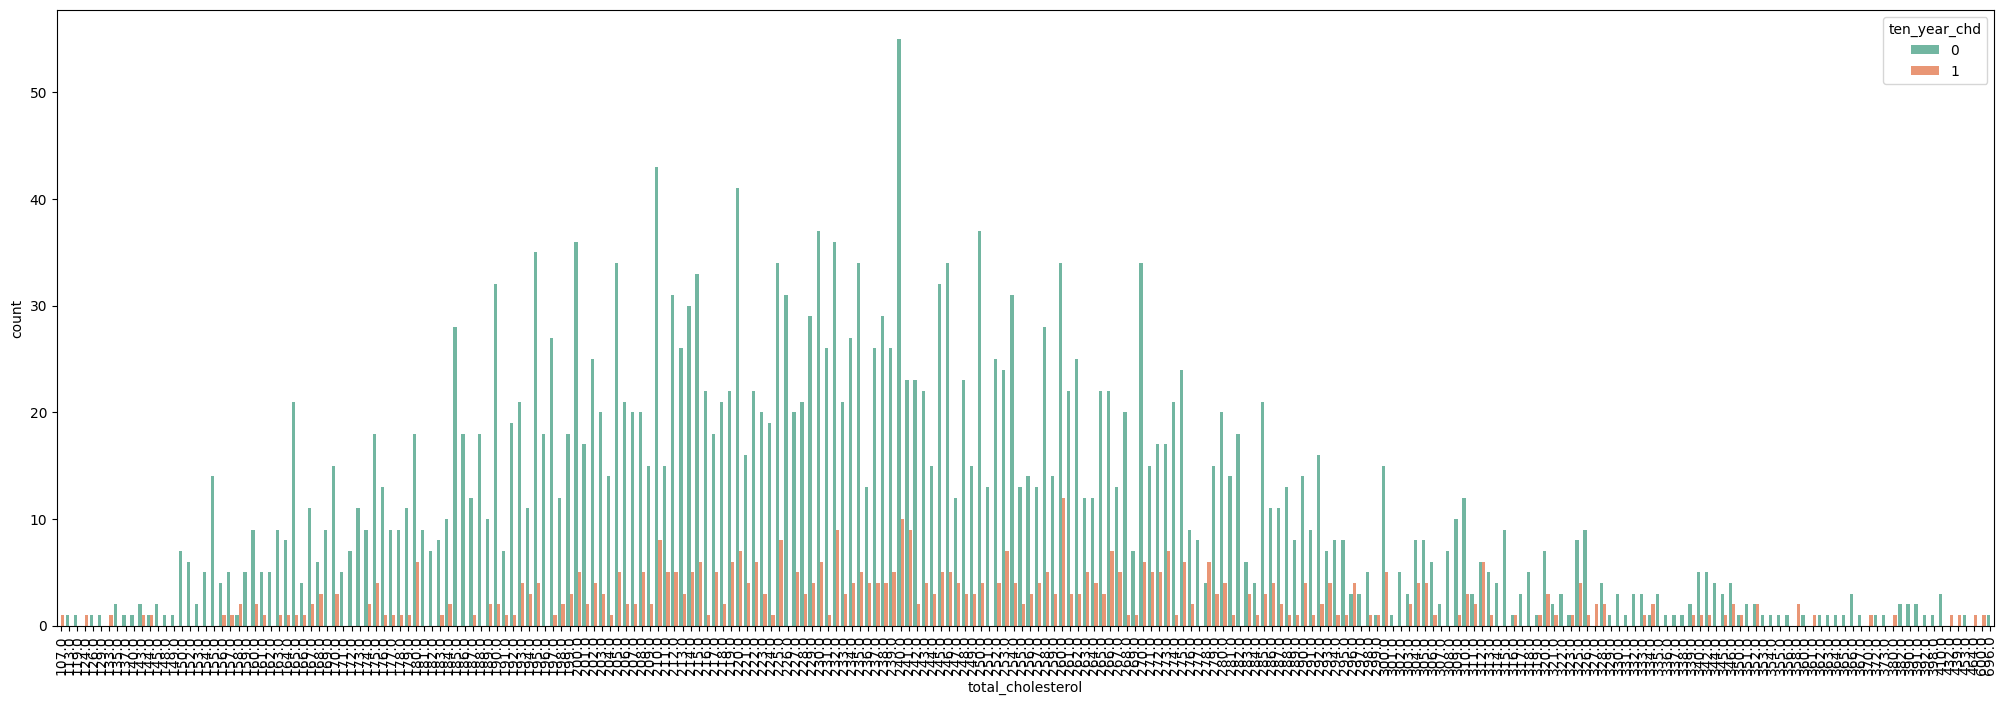

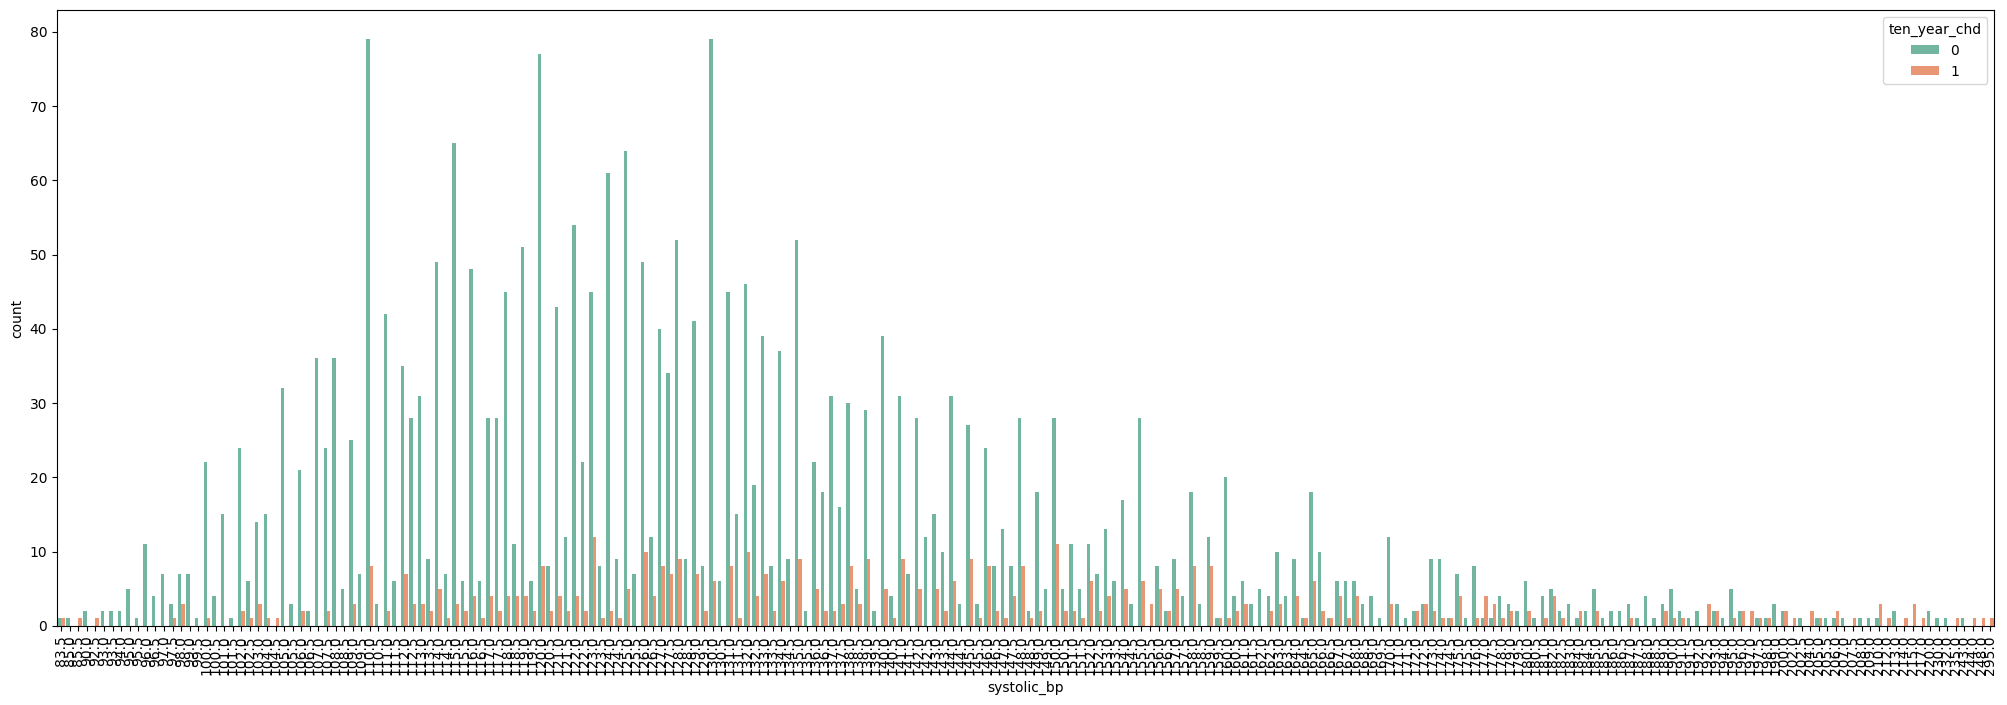

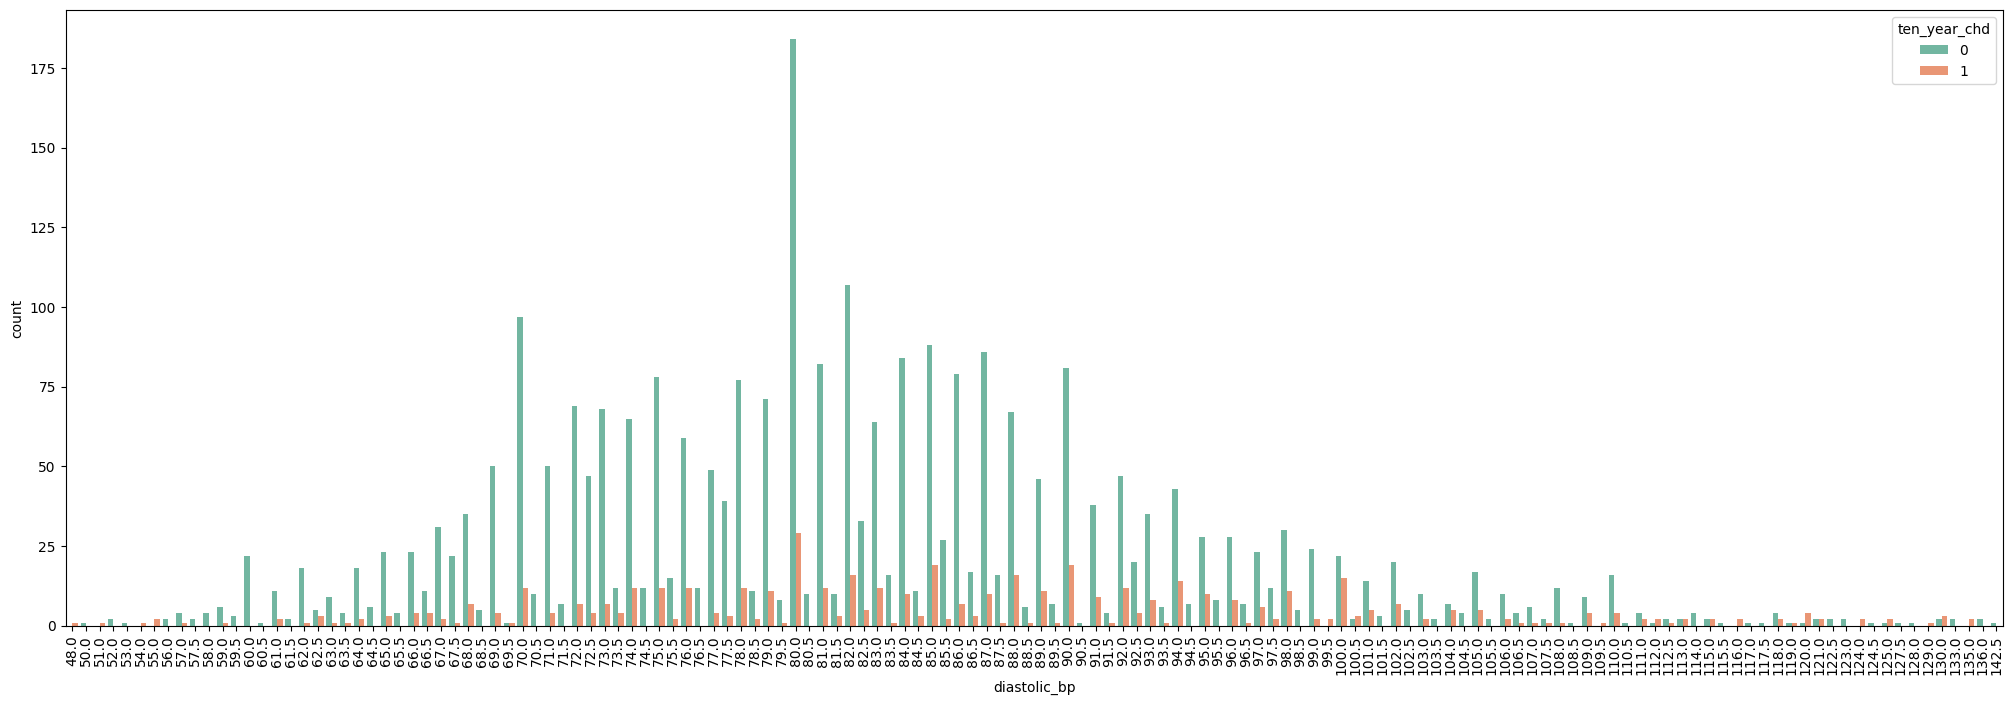

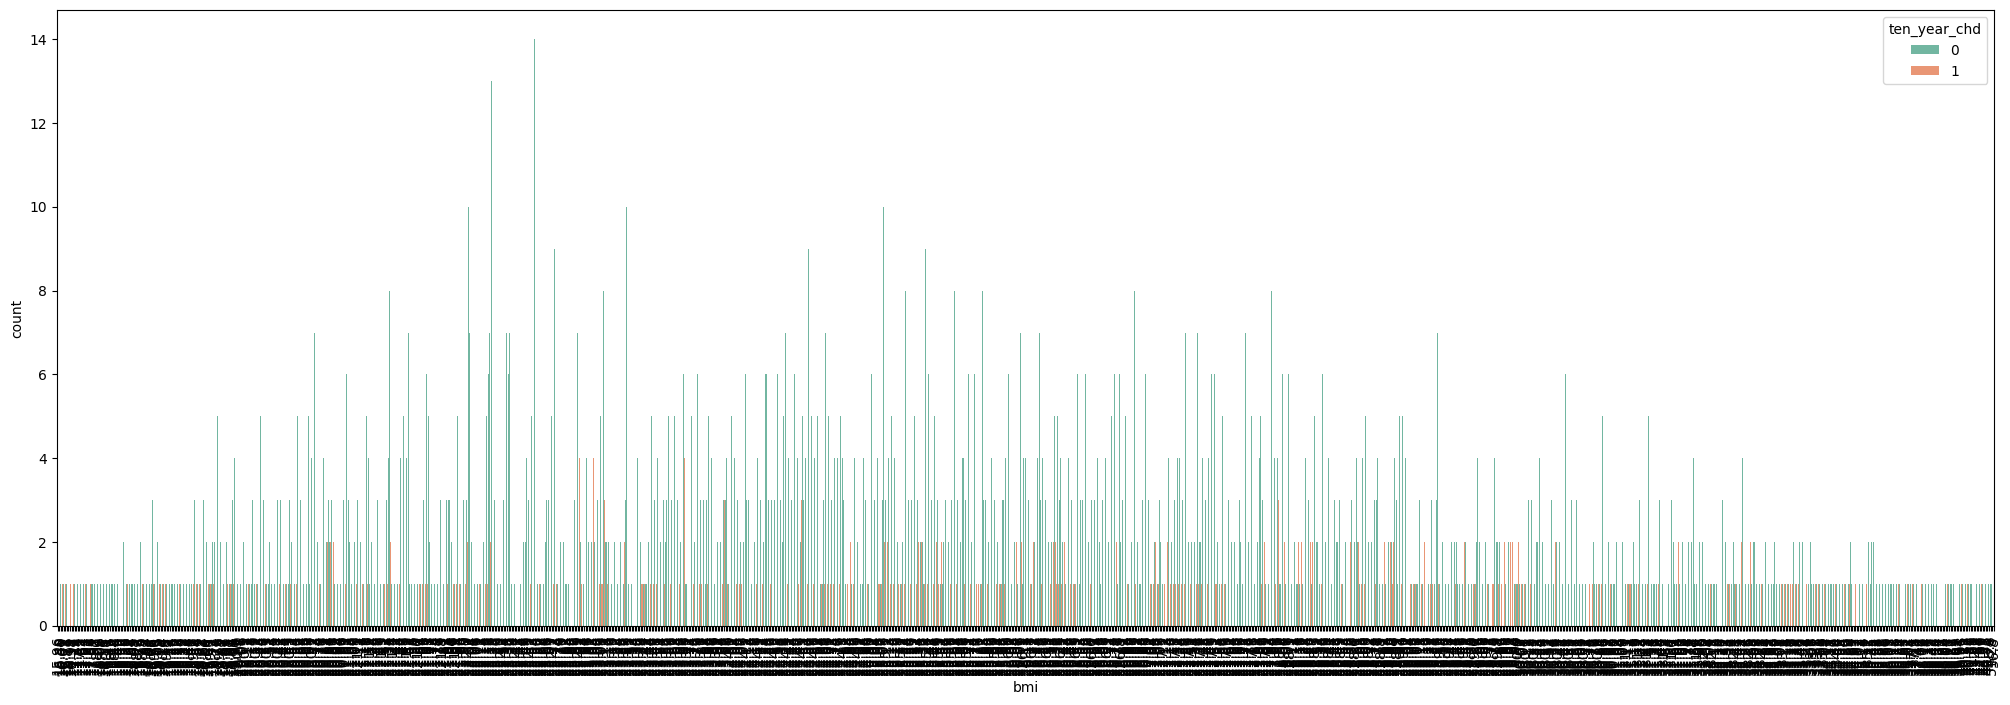

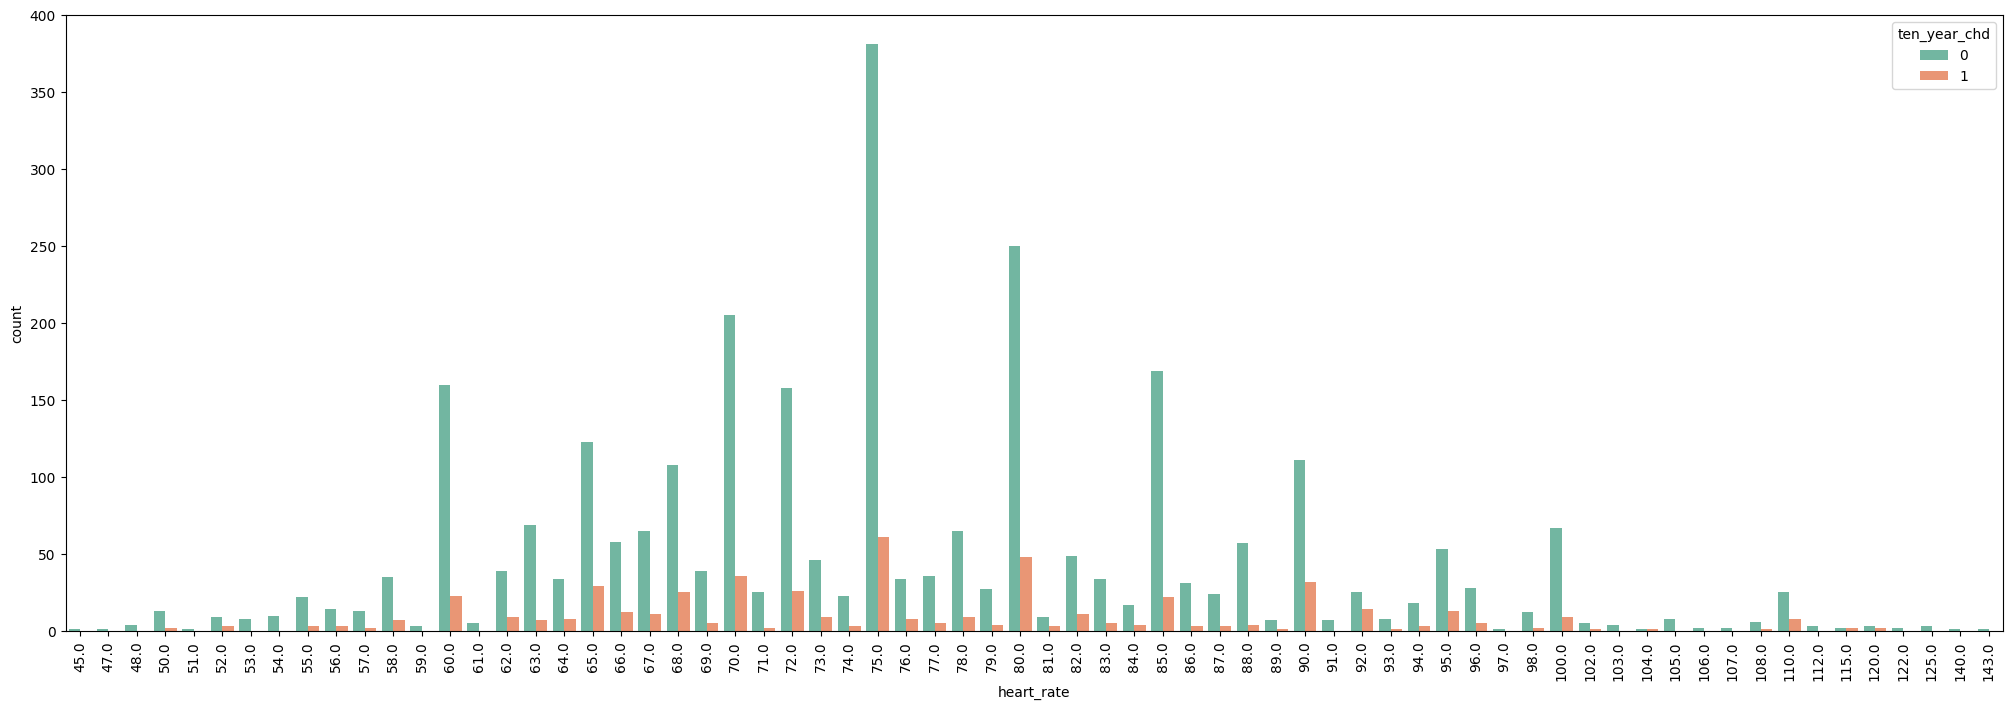

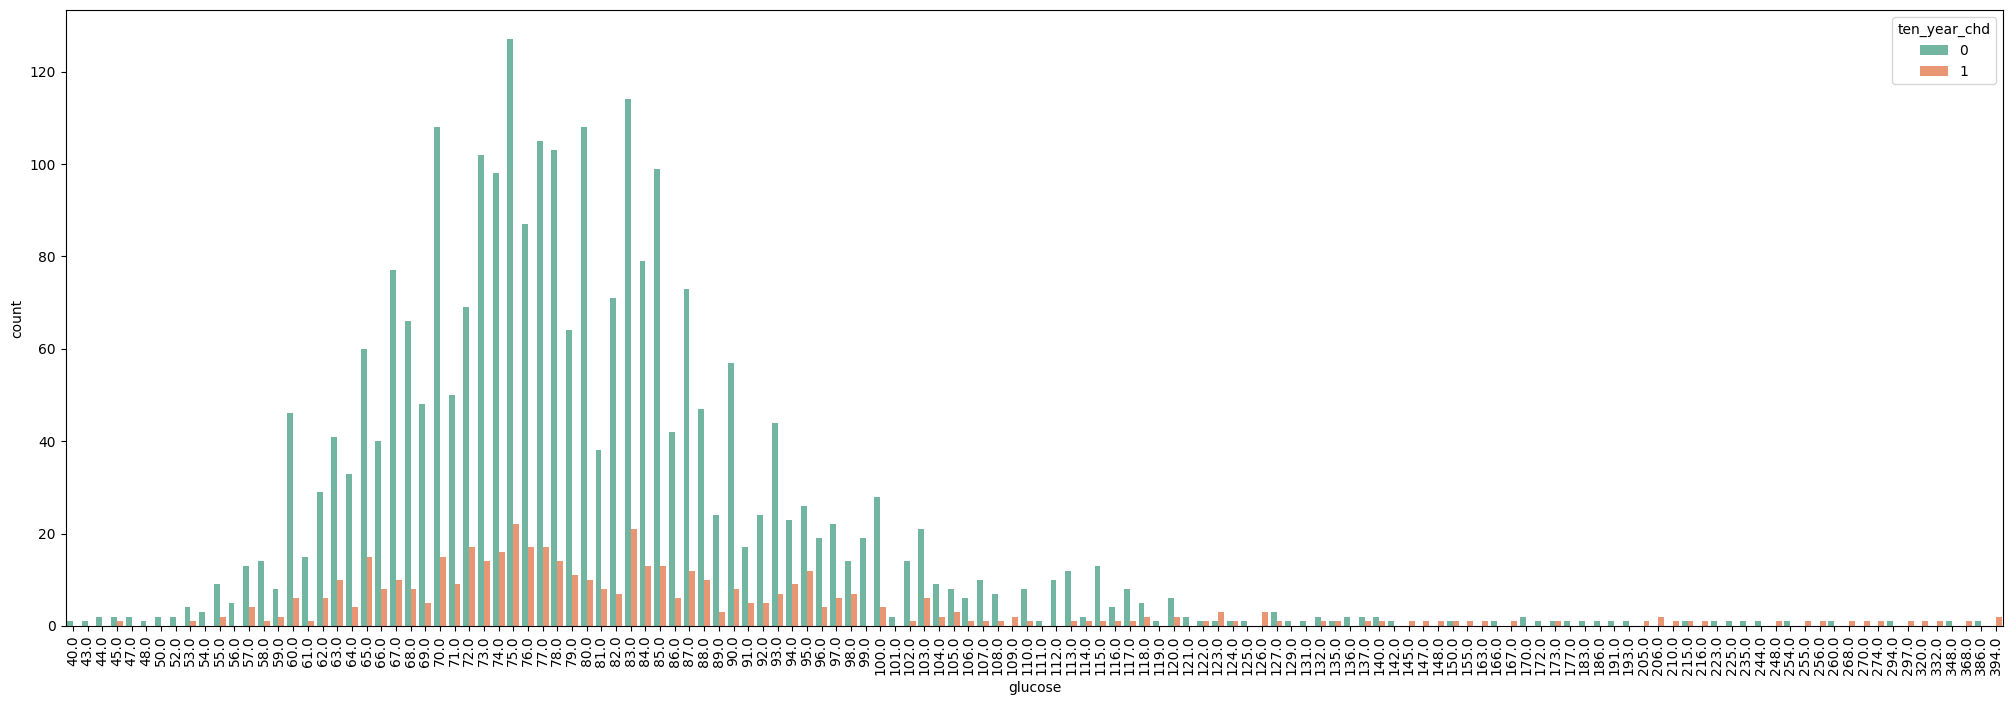

In [24]:
for i in continuous_var:
  plt.figure(figsize=(25,8))
  plt.xticks(rotation=90)
  sns.countplot(x=i, hue= dependent_var[0], data = data_2, palette="Set2")
  plt.show()


##### 1. Why did you pick the specific chart?

Countplot is a popular type of data visualization used to display the distribution of categorical data. It is a specific type of bar plot that shows the number of occurrences of each category in the dataset. There are several reasons why we often choose to use countplot such as frequency, comparsion of each independent variable with dependent variable, we will also able to understand the distribution of the data and get trends or pattern

##### 2. What is/are the insight(s) found from the chart?



For age vs ten_year_chd, we can see that the density for positive cases is high means at higher age as compared to lower age indicating that the positive cases are higher in older people.

For cigs_per_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For ten_year_chd and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 5

<Figure size 1000x500 with 0 Axes>

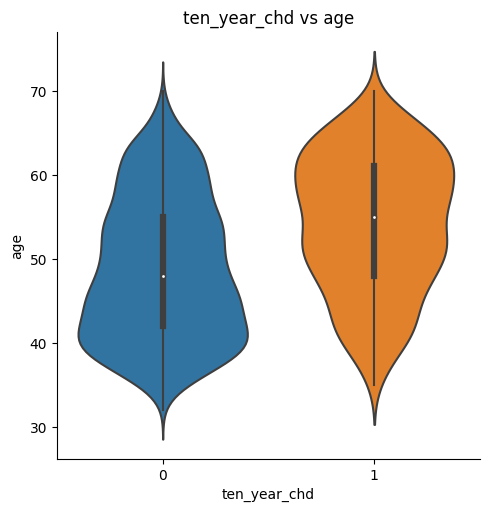

<Figure size 1000x500 with 0 Axes>

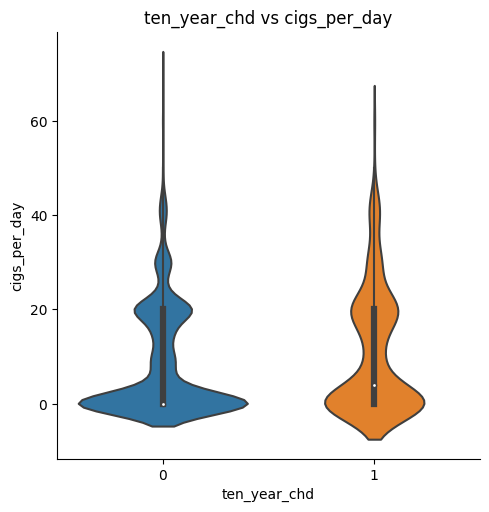

<Figure size 1000x500 with 0 Axes>

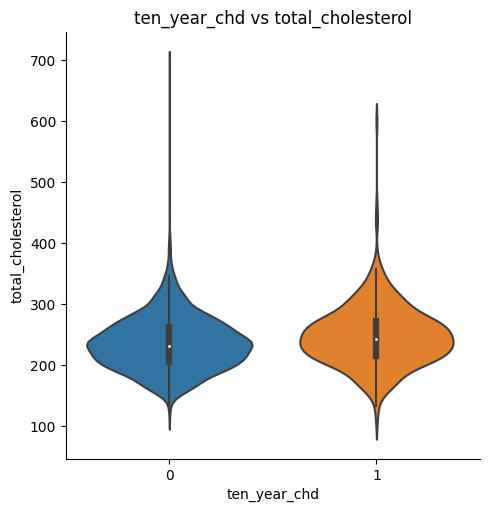

<Figure size 1000x500 with 0 Axes>

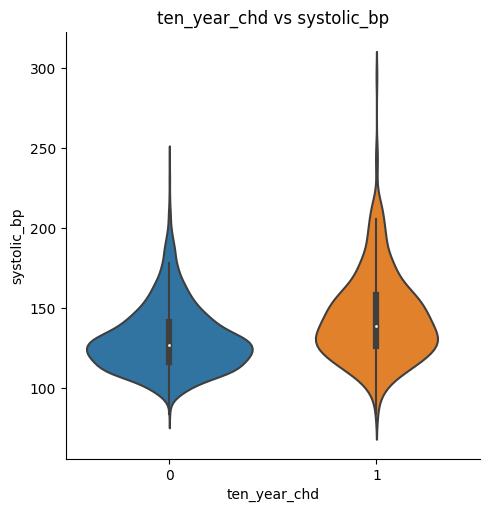

<Figure size 1000x500 with 0 Axes>

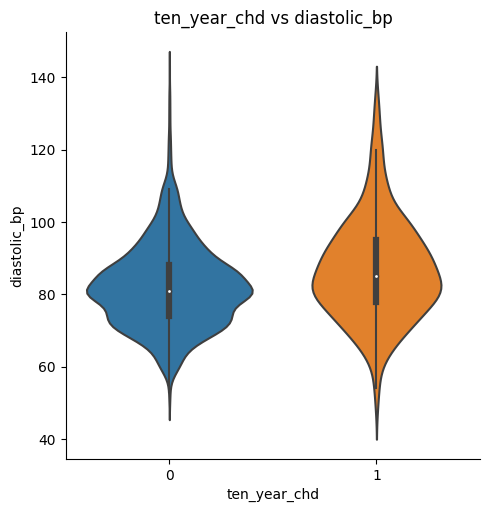

<Figure size 1000x500 with 0 Axes>

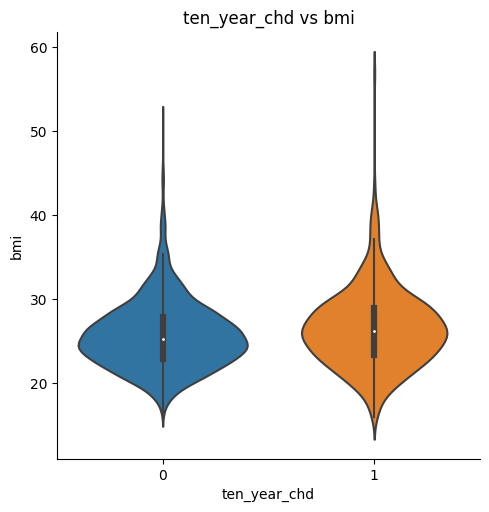

<Figure size 1000x500 with 0 Axes>

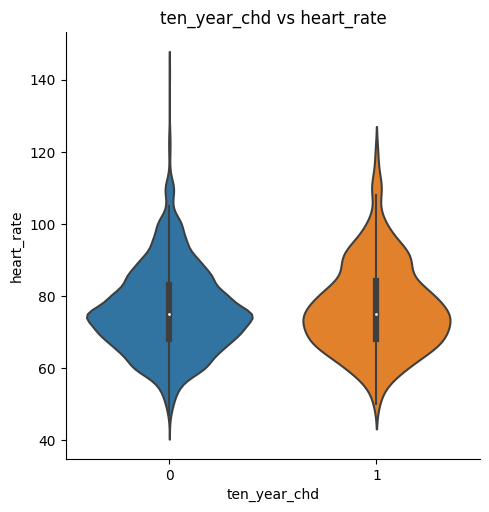

<Figure size 1000x500 with 0 Axes>

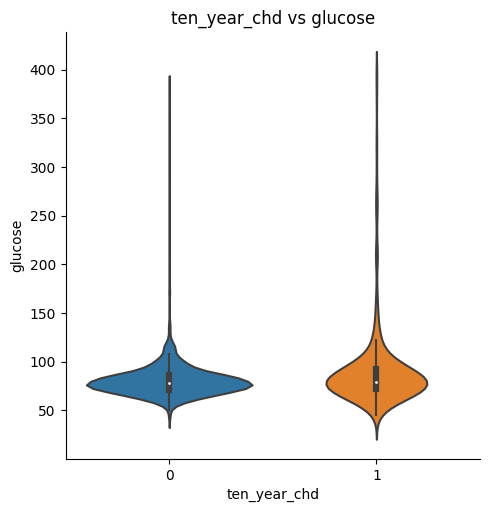

In [25]:

# Chart - 4 visualization code
# Relationship between the dependent variable and continuous independent variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  sns.catplot(x=dependent_var[0],y=i,data=data_2,kind='violin')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

For age vs ten_year_chd, we can see that the density for positive cases is high means at higher age as compared to lower age indicating that the positive cases are higher in older people.

For cigs_per_day, the negative cases are more for the non smokers compared to the positive cases for non smokers.

For ten_year_chd and glucose, the negative cases have high density compared to the positive cases for the same value of glucose.

The remaining charts do not provide much information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the violin chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution and density of data across different categories can help businesses identify patterns, trends, and potential areas of focus. For example, the insight that positive cases of ten-year CHD are higher in older people suggests the need for targeted preventive measures or specialized treatments for this demographic. Similarly, the insight regarding the relationship between smoking and negative cases of CHD can inform smoking cessation programs or campaigns to reduce the risk of CHD.

While the insights gained from the chart can be valuable, it's important to note that the impact on business growth would depend on various factors. The actual business impact would require further analysis and strategic implementation of these insights. Additionally, without specific business context and objectives, it is challenging to determine if there are any insights that would directly lead to negative growth. However, using the insights to better understand the distribution of health conditions and risk factors can potentially help businesses in the healthcare industry develop more effective strategies and interventions to improve patient outcomes and drive positive growth.

#### Chart - 6 - Correlation Heatmap

<Axes: >

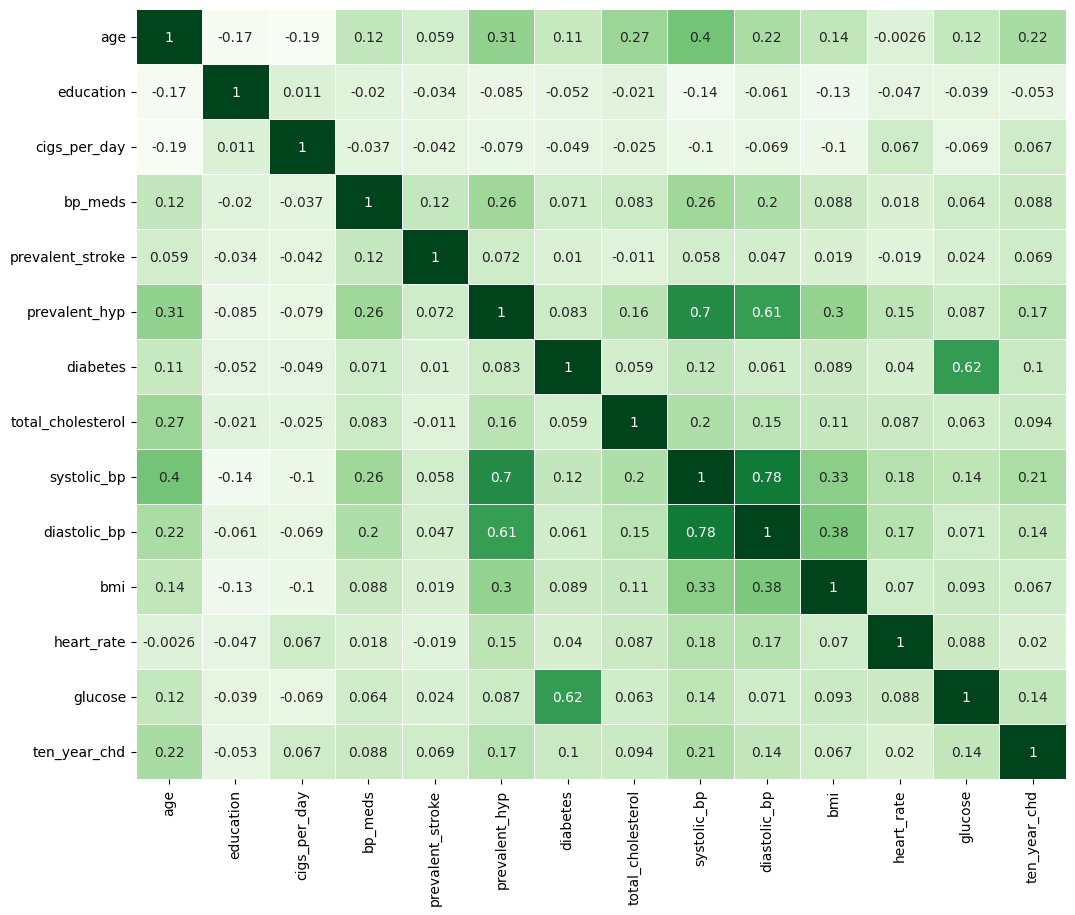

In [26]:
# Correlation Heatmap visualization code
corr = data_2.corr()

# display the heatmap.
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=False)

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

Here we see that the systolic_bp and diastolic_bp are highly correlated, also diabetes and glucose have a correlation of 0.62. Education is not importand as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart - 7 - Pair Plot

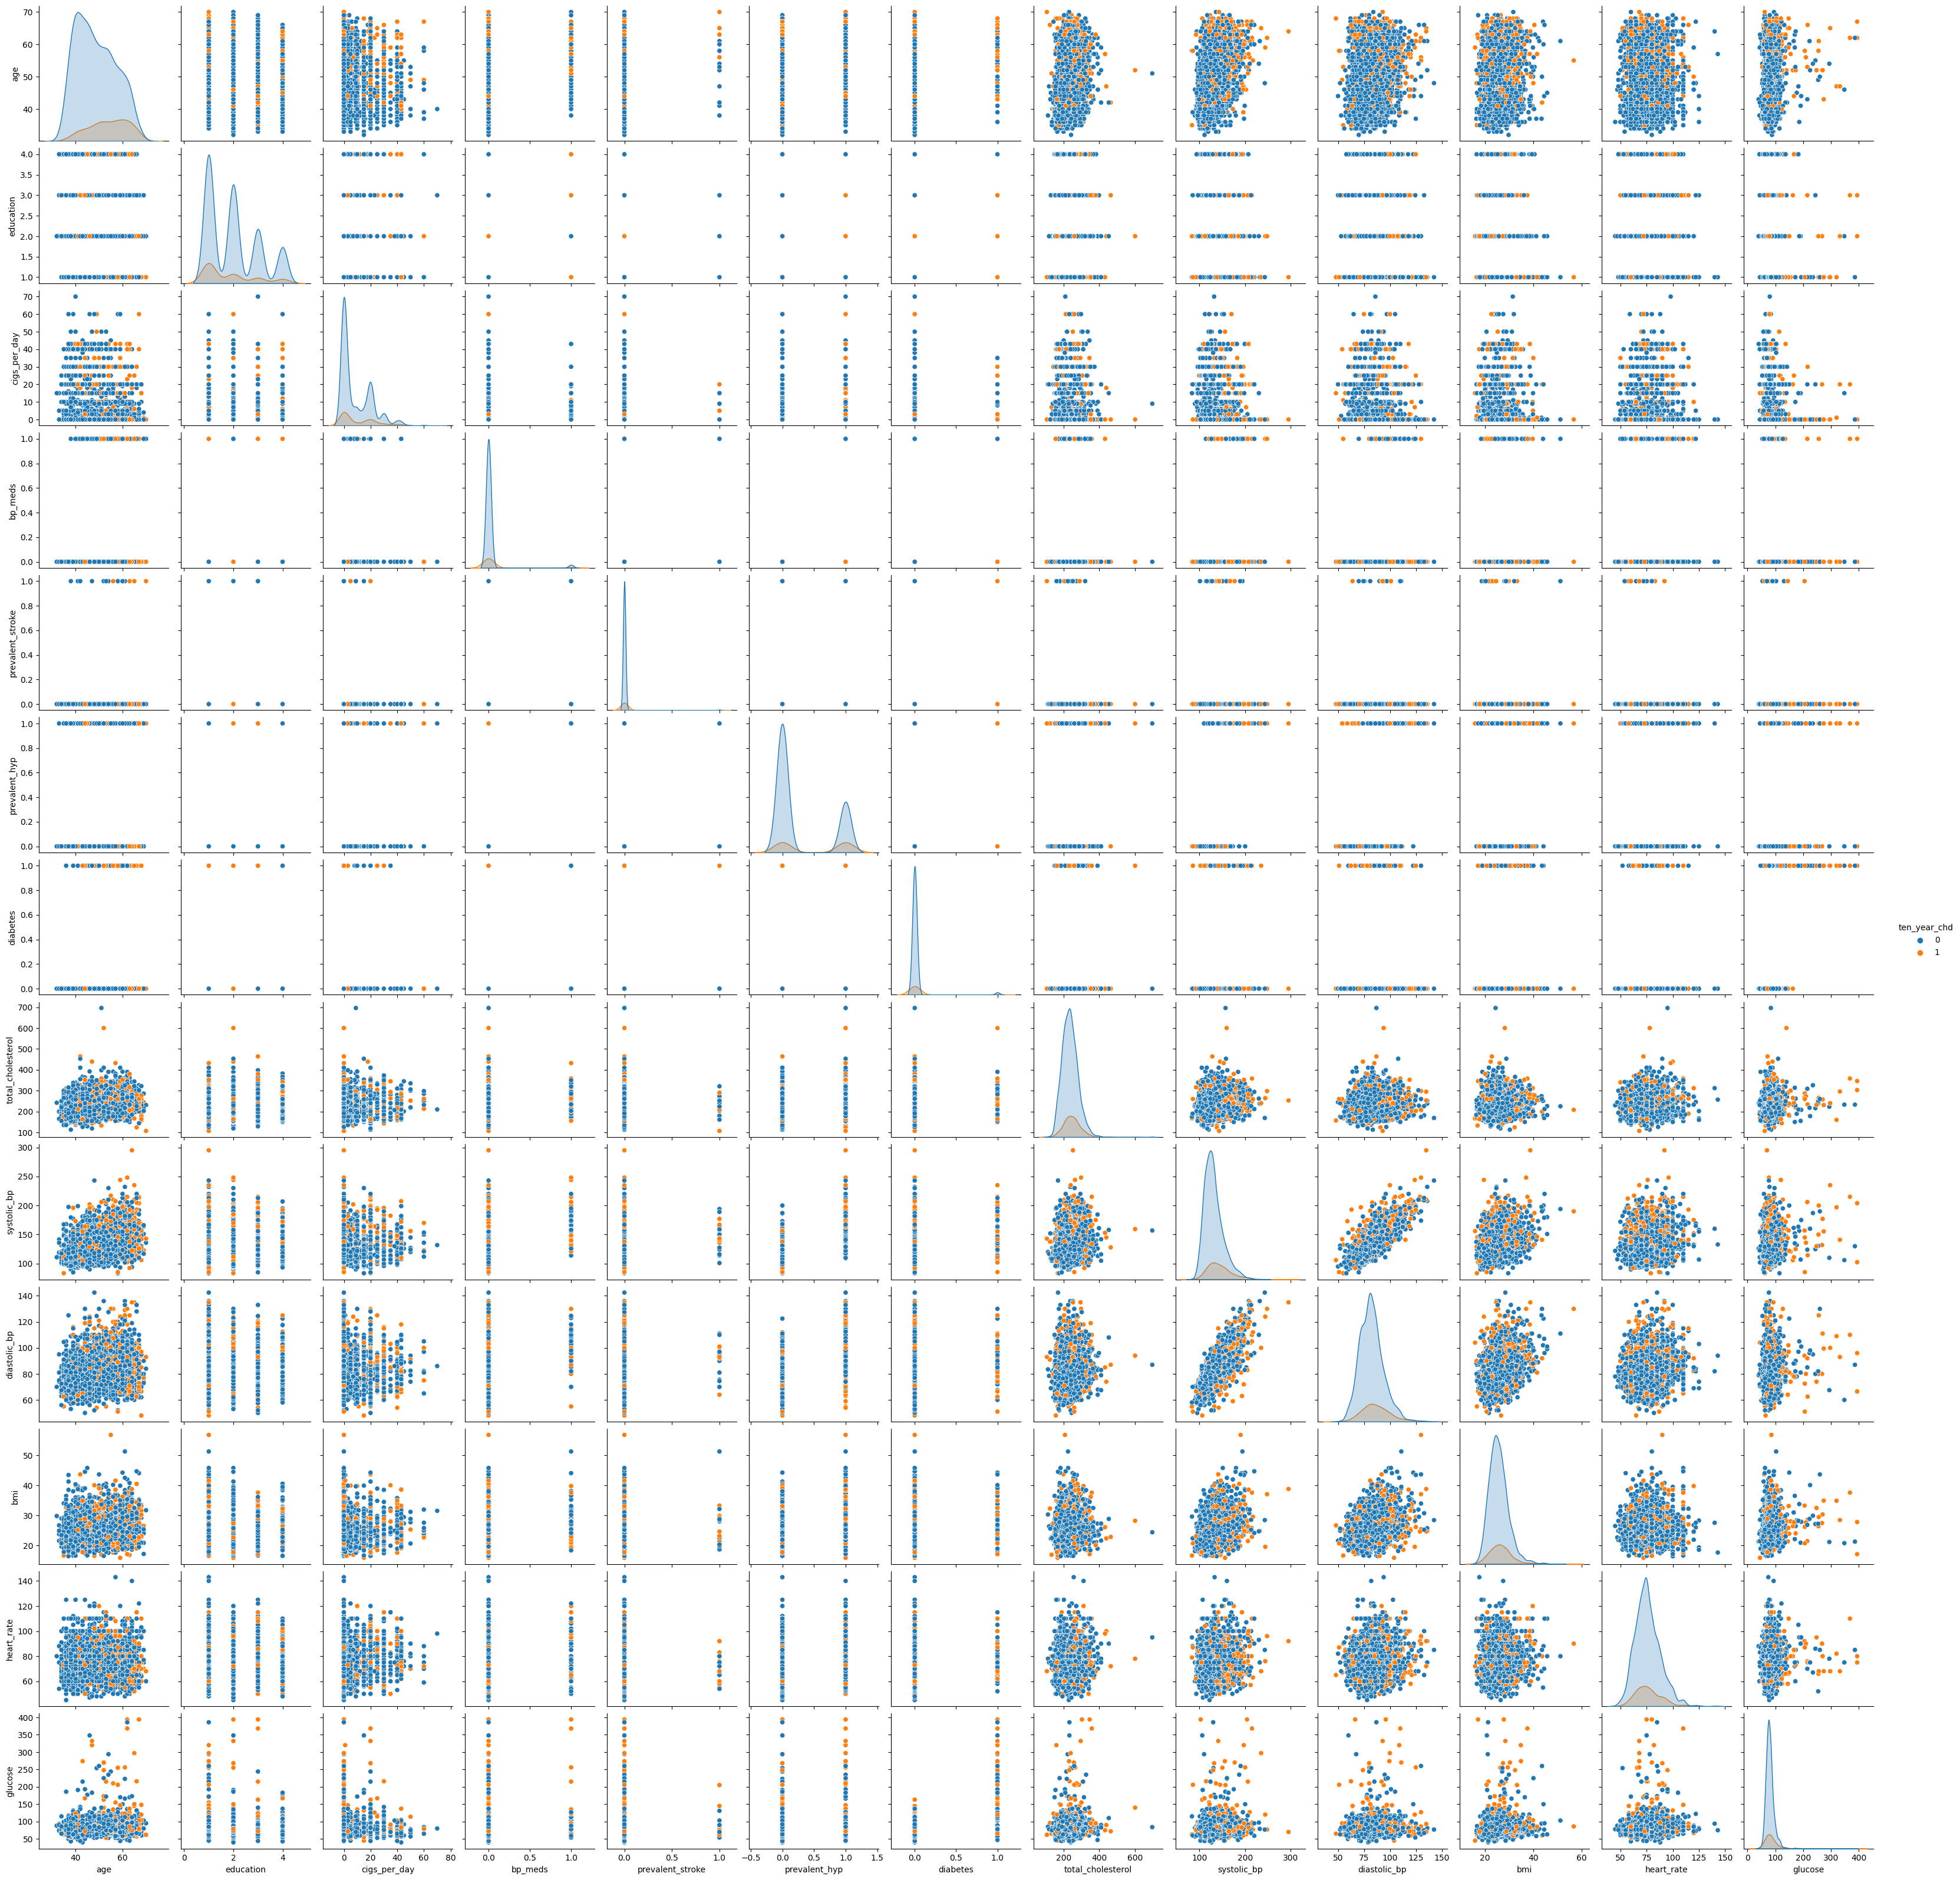

In [27]:

# Pair Plot
sns.pairplot(data_2, hue="ten_year_chd")
plt.show()


##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

We see that the cigs_per_day data distribution is highly skewed and it contains high 0 value so we can convert this into categorical column.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(Ho): There is no association between education level and CHD outcome.

Alternate hypothesis(H1): There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create the contingency table
contingency_table = pd.crosstab(data_2['education'], data_2['ten_year_chd'])

# Perform the chi-squared test and get the p-value
_, p_value, _, _ = chi2_contingency(contingency_table)

# Print the p-value
print(f'p-value: {p_value}')


p-value: 6.038646749234552e-05


The p value is significantly lower than 0.05 so we reject the null hypothesis.

##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD), I performed a chi-squared test of independence. This statistical test allowed me to determine if there was a significant association between education level and CHD outcome. By calculating the chi-squared statistic and p-value, I was able to make a statistical inference about the relationship between these two variables in our dataset.

##### Why did you choose the specific statistical test?

I chose to use the chi-squared test of independence to test the hypothesis that the ‘education’ column does not impact the outcome of chronic heart disease (CHD) because it is an appropriate statistical test for determining if there is a significant association between two categorical variables. In this case, both education level and CHD outcome are categorical variables, so the chi-squared test is a suitable choice.

The chi-squared test works by comparing the observed frequency distribution of the data in a contingency table to the expected frequency distribution under the assumption that the null hypothesis is true. If there is a significant difference between the observed and expected frequencies, it suggests that there is an association between the two variables.

Overall, I use the chi-squared test of independence because it is a widely used and well-established statistical test for analyzing the relationship between two categorical variables. It allowed me to make a statistical inference about the relationship between education level and CHD outcome in our dataset.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**Education**

In [29]:
# Replacing the missing values in the categorical columns with its mode
data_2['education'] = data_2['education'].fillna(data_2['education'].mode()[0])

**Bp-meds**

In [30]:
data_2['bp_meds'] = data_2['bp_meds'].fillna(data_2['bp_meds'].mode()[0])

**Cig_per_day**

In [31]:

# Mean and median number of cigarettes per day
data_2.cigs_per_day.mean().round(0),data_2.cigs_per_day.median()

(9.0, 0.0)

In [32]:

# All missing values in the cigs_per_day column
data_2[data_2['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

It is observed that the missing value of the cigs per day for all entry has the 'is smoking' column as YES that is they smoke.

In [33]:
# mean and median number of cigarettes per day for a smoker (excluding non-smokers)
data_2[data_2['is_smoking']=='YES']['cigs_per_day'].mean(),data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median()


(18.345945945945946, 20.0)

In [34]:
# Imputing the missing values in the cigs_per_day
data_2['cigs_per_day'] = data_2['cigs_per_day'].fillna(data_2[data_2['is_smoking']=='YES']['cigs_per_day'].median())

**Cholesterol**

In [35]:
# Mean and median for total_cholesterol
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.07428400954655, 234.0)

**BMI**

In [36]:
# Mean and median for bmi
data_2.bmi.mean(),data_2.bmi.median()

(25.7949644549763, 25.38)

**HeartRate**

In [37]:
# Mean and median for heart_rate
data_2.heart_rate.mean(),data_2.heart_rate.median()


(75.97727943346119, 75.0)

In [38]:

# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
data_2['total_cholesterol'] = data_2['total_cholesterol'].fillna(data_2['total_cholesterol'].median())
data_2['bmi'] = data_2['bmi'].fillna(data_2['bmi'].median())
data_2['heart_rate'] = data_2['heart_rate'].fillna(data_2['heart_rate'].median())

In [39]:


# mean and median of total_cholesterol after median imputation
data_2.total_cholesterol.mean(),data_2.total_cholesterol.median()

(237.03982300884957, 234.0)

In [40]:

# mean and median of bmi after median imputation
data_2.bmi.mean(),data_2.bmi.median()

(25.793250737463126, 25.38)

In [41]:

# mean and median of heart_rate after median imputation
data_2.heart_rate.mean(),data_2.heart_rate.median()

(75.97699115044247, 75.0)

**Glucose**

In [42]:

# total missing values in glucose
data_2.glucose.isna().sum()

304

In [43]:

# Mean, median, and mode for glucose
data_2.glucose.mean(),data_2.glucose.median(),data_2.glucose.mode()

(82.08651976668827,
 78.0,
 0    75.0
 Name: glucose, dtype: float64)

In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies.

To counteract this, the KNN imputer method could be employed to replace the missing data.

In a time series dataset, the missing values could be estimated through interpolation, which is a method of estimating missing data points.

In [44]:

data_2

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
0      64        2.0   F        YES           3.0      0.0                 0   
1      36        4.0   M         NO           0.0      0.0                 0   
2      46        1.0   F        YES          10.0      0.0                 0   
3      50        1.0   M        YES          20.0      0.0                 0   
4      64        1.0   F        YES          30.0      0.0                 0   
...   ...        ...  ..        ...           ...      ...               ...   
3385   60        1.0   F         NO           0.0      0.0                 0   
3386   46        1.0   F         NO           0.0      0.0                 0   
3387   44        3.0   M        YES           3.0      0.0                 0   
3388   60        1.0   M         NO           0.0      0.0                 0   
3389   54        3.0   F         NO           0.0      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
0                 0         0              221.0        148.0          85.0   
1                 1         0              212.0        168.0          98.0   
2                 0         0              250.0        116.0          71.0   
3                 1         0              233.0        158.0          88.0   
4                 0         0              241.0        136.5          85.0   
...             ...       ...                ...          ...           ...   
3385              0         0              261.0        123.5          79.0   
3386              0         0              199.0        102.0          56.0   
3387              1         0              352.0        164.0         119.0   
3388              1         0              191.0        167.0         105.0   
3389              0         0              288.0        124.0          77.0   

        bmi  heart_rate  glucose  ten_year_chd  
0     25.38        90.0     80.0             1  
1     29.77        72.0     75.0             0  
2     20.35        88.0     94.0             0  
3     28.26        68.0     94.0             1  
4     26.42        70.0     77.0             0  
...     ...         ...      ...           ...  
3385  29.28        70.0    103.0             0  
3386  21.96        80.0     84.0             0  
3387  28.92        73.0     72.0             1  
3388  23.01        80.0     85.0             0  
3389  29.88        79.0     92.0             0  

[3390 rows x 16 columns]

In [45]:

# Replacing the string values of the binary column with 0 and 1

data_2['sex'] = np.where(data_2['sex'] == 'M',1,0)
data_2['is_smoking'] = np.where(data_2['is_smoking'] == 'YES',1,0)

In [46]:

# changing datatypes
data_2 = data_2.astype({'age': int,'sex':int,'is_smoking':int,'cigs_per_day':int,
               'bp_meds':int,'prevalent_stroke':int,'prevalent_hyp':int,'diabetes':int,
               'total_cholesterol':float,'systolic_bp':float,'diastolic_bp':float,
               'bmi':float,'heart_rate':float,'glucose':float,'ten_year_chd':int})

In [47]:

# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=10)
imputed = imputer.fit_transform(data_2)
data_2 = pd.DataFrame(imputed, columns=data_2.columns)

In [48]:
# mean, median, and mode for glucose after knn imputation
data_2.glucose.describe()

count    3390.000000
mean       82.043274
std        23.236590
min        40.000000
25%        72.000000
50%        78.000000
75%        86.000000
max       394.000000
Name: glucose, dtype: float64

In [49]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3390 non-null   float64
 1   education          3390 non-null   float64
 2   sex                3390 non-null   float64
 3   is_smoking         3390 non-null   float64
 4   cigs_per_day       3390 non-null   float64
 5   bp_meds            3390 non-null   float64
 6   prevalent_stroke   3390 non-null   float64
 7   prevalent_hyp      3390 non-null   float64
 8   diabetes           3390 non-null   float64
 9   total_cholesterol  3390 non-null   float64
 10  systolic_bp        3390 non-null   float64
 11  diastolic_bp       3390 non-null   float64
 12  bmi                3390 non-null   float64
 13  heart_rate         3390 non-null   float64
 14  glucose            3390 non-null   float64
 15  ten_year_chd       3390 non-null   float64
dtypes: float64(16)
memory us

In [50]:
# checking for missing values
data_2.isna().sum()


age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used median, mode and KNN imputation techniques to handle missing values in the dataset. I chose to use these techniques because they are appropriate for the nature of the data and the specific problem at hand. For example, I used median imputation for numerical variables that were skewed, as it is a robust measure of central tendency that is not affected by outliers.

I used mode imputation for categorical variables, as it is the most common value and can be a good estimate for missing values.

I also used KNN imputation, which works by finding similar observations in the dataset and using their values to impute missing values. This technique can be useful when there are patterns or relationships in the data that can be leveraged to make more accurate imputations.



### 2. Handling Outliers

In [51]:
continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [52]:
# Removing outliers using the clip method
for col in continuous_var:
    q1, q3, median = data_2[col].quantile([0.25, 0.75, 0.5])
    lower_limit = q1 - 1.5 * (q3 - q1)
    upper_limit = q3 + 1.5 * (q3 - q1)

    # Replacing outliers with the upper and lower limits
    data_2[col] = data_2[col].clip(lower_limit, upper_limit)


##### What all outlier treatment techniques have you used and why did you use those techniques?


I have used the Interquartile Range (IQR) method to identify and remove outliers in the continuous columns of the dataset. I chose to use this technique because it is a robust method for detecting outliers that is not affected by the presence of extreme values. The IQR is calculated as the difference between the 75th and 25th percentiles of the data, and any value that falls below the 25th percentile minus 1.5 times the IQR or above the 75th percentile plus 1.5 times the IQR is considered an outlier. By using this method, I was able to identify and remove outliers in a consistent and objective manner

### 3. Categorical Encoding

In [53]:

# Encode your categorical columns
data_2 = pd.get_dummies(data_2, columns=['education'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

Onehot encoding is used to encode the education column.

All the remaining categorical columns are binary (0/1) so no need to encode them.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulate

In [54]:

# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [55]:
continuous_feature_df = pd.DataFrame(data_2[continuous_var])

In [56]:

continuous_feature_df

age  cigs_per_day  total_cholesterol  systolic_bp  diastolic_bp    bmi  \
0     64.0           3.0              221.0        148.0         85.00  25.38   
1     36.0           0.0              212.0        168.0         98.00  29.77   
2     46.0          10.0              250.0        116.0         71.00  20.35   
3     50.0          20.0              233.0        158.0         88.00  28.26   
4     64.0          30.0              241.0        136.5         85.00  26.42   
...    ...           ...                ...          ...           ...    ...   
3385  60.0           0.0              261.0        123.5         79.00  29.28   
3386  46.0           0.0              199.0        102.0         56.00  21.96   
3387  44.0           3.0              351.0        164.0        113.25  28.92   
3388  60.0           0.0              191.0        167.0        105.00  23.01   
3389  54.0           0.0              288.0        124.0         77.00  29.88   

      heart_rate  glucose  
0           90.0     80.0  
1           72.0     75.0  
2           88.0     94.0  
3           68.0     94.0  
4           70.0     77.0  
...          ...      ...  
3385        70.0    103.0  
3386        80.0     84.0  
3387        73.0     72.0  
3388        80.0     85.0  
3389        79.0     92.0  

[3390 rows x 8 columns]

In [57]:

calc_vif(data_2[[i for i in continuous_feature_df]])

variables         VIF
0                age   42.882952
1       cigs_per_day    1.641431
2  total_cholesterol   33.359306
3        systolic_bp  124.496779
4       diastolic_bp  135.494170
5                bmi   50.091178
6         heart_rate   40.630903
7            glucose   39.364806

In [58]:

# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp

data_2['pulse_pressure'] = data_2['systolic_bp']-data_2['diastolic_bp']
data_2.drop('systolic_bp',axis=1,inplace=True)
data_2.drop('diastolic_bp',axis=1,inplace=True)


In [59]:
# columns
data_2.columns

Index(['age', 'sex', 'is_smoking', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

In [60]:

# Updating the continuous_var list

continuous_var.remove('systolic_bp')
continuous_var.remove('diastolic_bp')
continuous_var.append('pulse_pressure')

In [61]:

continuous_feature_df = pd.DataFrame(data_2[continuous_var])

In [62]:
calc_vif(data_2[[i for i in continuous_feature_df]])


variables        VIF
0                age  41.924657
1       cigs_per_day   1.639412
2  total_cholesterol  32.822066
3                bmi  40.248704
4         heart_rate  37.627124
5            glucose  39.063384
6     pulse_pressure  17.545779

<Axes: >

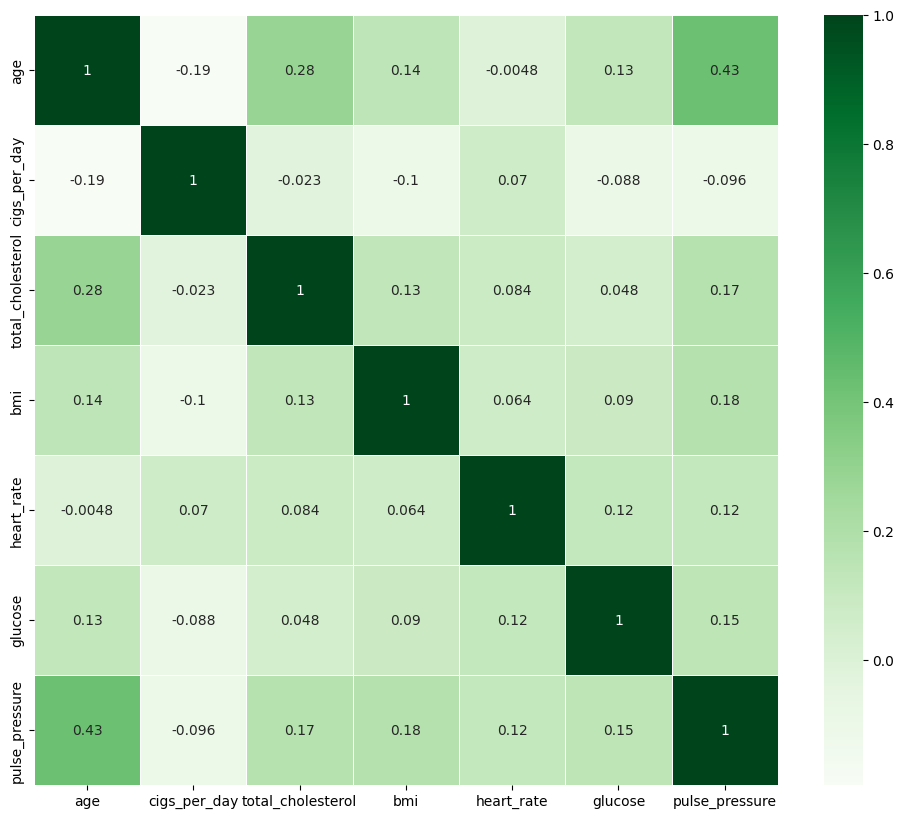

In [63]:

corr = data_2[continuous_var].corr()
# display the heatmap.
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr,cmap= 'Greens', linewidths=.5,annot=True, ax = ax,cbar=True)

#### 2. Feature Selection

In [64]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
data_2.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

In [65]:

data_2.columns

Index(['age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke',
       'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate',
       'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0',
       'education_3.0', 'education_4.0', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

We have used variance inflation factor to remove multicollinearity and we found that the systolic and diastolic blood pressure have high VIF, so we created a new feature which is pulse pressure.

It was also found that the is smoking column just had the values yes or no for smoking and the same was conveyed in the cigs per day column where for non smoker, the column had 0 and for smoker it had the number of cigeratte per day.

##### Which all features you found important and why?

Finally the important colums are 'age', 'sex', 'cigs_per_day', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol', 'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'education_1.0', 'education_2.0', 'education_3.0', 'education_4.0', 'pulse_pressure'.

All these columns contains the demographic, behavioural, current medical and historic medical data.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

---


In [66]:

# Transform Your data
# skewness along the index axis
(data_2[continuous_var]).skew(axis = 0)

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.466921
pulse_pressure       0.946833
dtype: float64

In [67]:

# Skew for sqrt transformation
np.sqrt(data_2[continuous_var]).skew(axis = 0)


age                  0.103528
cigs_per_day         0.449712
total_cholesterol    0.094129
bmi                  0.255372
heart_rate           0.222906
glucose              0.270084
pulse_pressure       0.550119
dtype: float64

In [68]:

# Skew for log10 transformation
np.log10(data_2[continuous_var]+1).skew(axis = 0)

age                 -0.015053
cigs_per_day         0.273181
total_cholesterol   -0.157251
bmi                  0.073046
heart_rate           0.027928
glucose              0.069235
pulse_pressure       0.168465
dtype: float64

In [69]:
# Implementing log transformation on continuous variables

data_2['age']                   = np.log10(data_2['age']+1)
data_2['cigs_per_day']          = np.sqrt(data_2['cigs_per_day'])
data_2['total_cholesterol']     = np.log10(data_2['total_cholesterol']+1)
data_2['bmi']                   = np.sqrt(data_2['bmi']+1)
data_2['heart_rate']            = np.log10(data_2['heart_rate']+1)
data_2['glucose']               = np.sqrt(data_2['glucose'])
data_2['pulse_pressure']        = np.sqrt(data_2['pulse_pressure'])

In [70]:

# Checking skew after log transformation
data_2[continuous_var].skew(axis = 0)

age                 -0.015053
cigs_per_day         0.449712
total_cholesterol   -0.157251
bmi                  0.262757
heart_rate           0.027928
glucose              0.270084
pulse_pressure       0.550119
dtype: float64

Yes the data need to be transformed as it was skewed.

We used log transform and squareroot transform on the different continuous columns to reduce the skew of the data.

### 6. Data Scaling

In [71]:
# Scaling your data
scaler = StandardScaler()
features = [i for i in data_2.columns if i not in ['ten_year_chd']]

In [72]:

features

['age',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'education_1.0',
 'education_2.0',
 'education_3.0',
 'education_4.0',
 'pulse_pressure']

In [73]:

continuous_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [74]:

data_2[continuous_var] = scaler.fit_transform(data_2[continuous_var])

In [75]:

# defining the X and y
X = data_2.drop('ten_year_chd',axis=1)
y = data_2['ten_year_chd']

##### Which method have you used to scale you data and why?



In this we have different independent features of different scale so we have used standard scalar method to scale our independent features into one scale.

### 7. Dimensionality Reduction


##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

### 8. Data Splitting

In [76]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [77]:

# Checking the train distribution of dependent variable
y_train.value_counts()

0.0    2297
1.0     415
Name: ten_year_chd, dtype: int64

##### What data splitting ratio have you used and why?

To train the model we have split the data into train and test using train_test_split method

We have split 80% of our data into train and 20% into test, this ratio provides a good balance between having enough data to train a model effectively and having enough data to evaluate the model’s performance on unseen data. By using 80% of the data for training, the model has access to a large amount of information to learn from, while the remaining 20% of the data can be used to assess how well the model generalizes to new data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

In [78]:
# Oversampling using SMOTETomek
# fit predictor and target variable
X_smote, y_smote = SMOTETomek(random_state=0).fit_resample(X_train, y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))




Samples in the original dataset:  2712
Samples in the resampled dataset:  4574


<Axes: title={'center': 'Target variable after SMOTE'}>

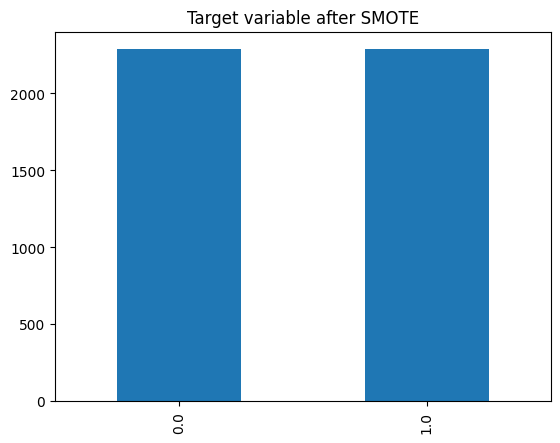

In [79]:
# visualize the target variable after SMOTE
y_smote.value_counts().plot(kind='bar', title='Target variable after SMOTE')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used the SMOTE combined with Tomek links oversampling technique to handle the imbalanced dataset. SMOTE works by generating synthetic samples from the minority class to balance the class distribution. It does this by selecting instances that are close in the feature space and drawing a line between them, then creating new instances along this line. Tomek links oversampling removes Tomek links, which are pairs of instances from different classes that are very close to each other in the feature space. By removing these instances, the decision boundary between the classes can be made clearer.

I chose to use this technique because it can improve the performance of machine learning models on imbalanced datasets by balancing the class distribution and making the decision boundary between classes clearer. By combining oversampling of the minority class with undersampling of the majority class, I was able to achieve a balanced dataset while also removing potential noise and ambiguity from the data.

In [80]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## ***7. ML Model Implementation***

### ML Model - 1: Logistics Regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [81]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [82]:
# Get the model coefficients
logistic_regression_model.coef_

array([[ 0.56176816,  0.29325035,  0.31333867,  0.02772595,  0.10998054,
         0.17107744,  0.15164389,  0.11325649, -0.00842319,  0.02502439,
         0.07710587,  0.03179638, -0.06370709,  0.00513675,  0.0367964 ,
         0.25474499]])

In [83]:
# Get the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [84]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8517699115044248
The accuracy on test data is  0.855457227138643


[[573   9]
 [ 89   7]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

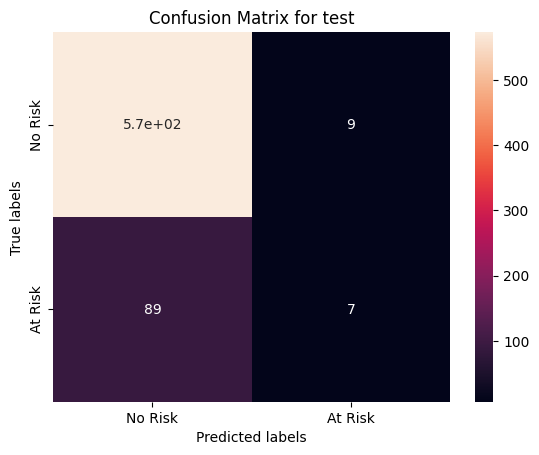

In [85]:
# Get the confusion matrix for test
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for test')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[2274   23]
 [ 379   36]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

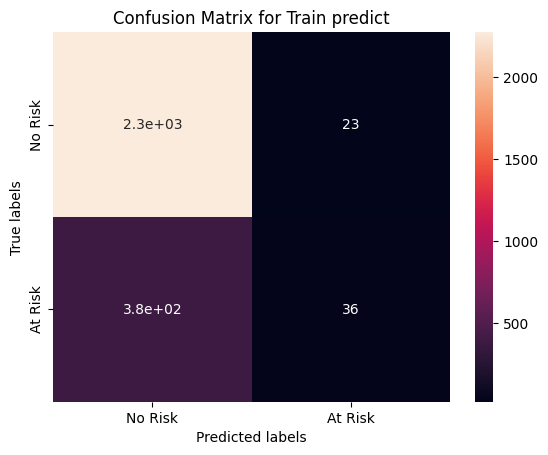

In [86]:
# Get the confusion matrix for train
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Logistic regression is a statistical method and a type of generalized linear model used for binary classification tasks. It is used to predict the probability that an instance belongs to a particular class. Despite its name, logistic regression is a classification algorithm, not a regression algorithm.

The key idea behind logistic regression is to model the relationship between the input features and the probability of an instance belonging to a specific class. It uses the logistic function (also known as the sigmoid function) to transform the output of a linear equation into a value between 0 and 1, representing the predicted probability.

#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

In [88]:
grid={"C":np.logspace(-5,8,15), "penalty":["l1","l2"]}
logreg = LogisticRegression()

In [89]:
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [90]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213, 'penalty': 'l2'}
Best score is 0.8532450618623834


In [91]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.5287263745704468
Accuracy score: 0.855457227138643
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      2297
         1.0       0.61      0.09      0.15       415

    accuracy                           0.85      2712
   macro avg       0.73      0.54      0.54      2712
weighted avg       0.82      0.85      0.80      2712



              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92       582
         1.0       0.44      0.07      0.13        96

    accuracy                           0.86       678
   macro avg       0.65      0.53      0.52       678
weighted avg       0.80      0.86      0.81       678



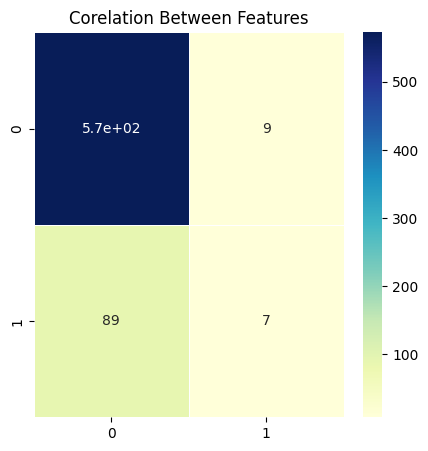

In [92]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

###ML Model - 2 : Decision Tree

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# now we train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [94]:
#Predicting on test cell and train cell
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 84.80825958702066
the training accuracy is 86.65191740412979


[[2247   50]
 [ 312  103]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

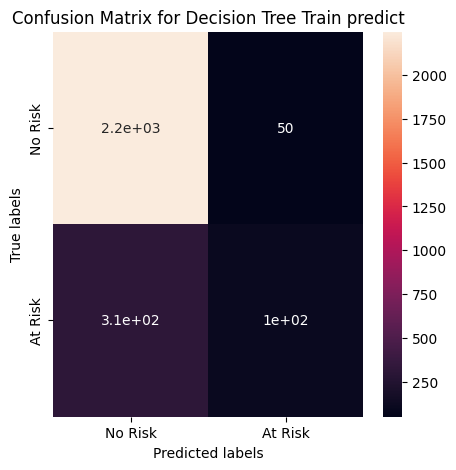

In [95]:
#the confusion matrix for training
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_train, train_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Train predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[559  23]
 [ 80  16]]


[Text(0, 0.5, 'No Risk'), Text(0, 1.5, 'At Risk')]

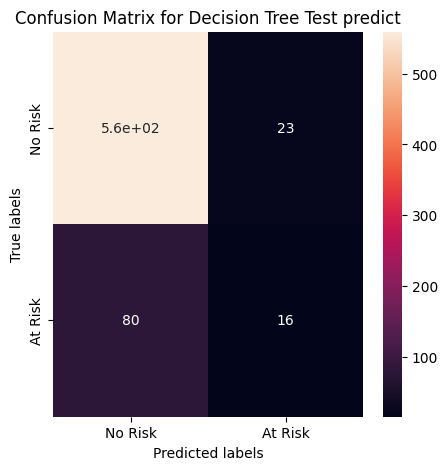

In [96]:
#the confusion matrix for test data
labels = ['No Risk', 'At Risk']
cm = confusion_matrix(y_test, test_preds)
print(cm)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Decision Tree Test predict')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)


A decision tree is a popular machine learning algorithm used for both classification and regression tasks. It is a type of supervised learning algorithm, meaning it learns from labeled data, where the target variable (dependent variable) is known during training. Decision trees are widely used for their simplicity, interpretability, and ability to handle both numerical and categorical data.

The decision tree algorithm builds a tree-like model, where each internal node represents a decision based on a feature (attribute), each branch corresponds to a possible outcome of that decision, and each leaf node represents a prediction or a class label. The process of creating the decision tree involves recursively splitting the data into subsets based on the values of different features, in a way that the resulting subsets are more homogeneous in terms of the target variable.

**Performance evaluation metrics**, also known as performance metrics or evaluation metrics, are measures used to assess the performance of a machine learning model or any predictive model. These metrics help quantify how well the model is performing in making predictions on new, unseen data.


**Accuracy**: It measures the proportion of correct predictions (both true positives and true negatives) over the total number of predictions. It is a commonly used metric for balanced datasets, but it can be misleading when dealing with imbalanced datasets.

**Precision**: Precision measures the proportion of true positives among the instances predicted as positive. It indicates the model's ability to avoid false positives.

**Recall** (Sensitivity or True Positive Rate): Recall measures the proportion of true positives among the actual positive instances. It indicates the model's ability to capture positive instances.

F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, especially when there is an imbalance between the classes.


In [97]:
#classification report for train
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93      2297
         1.0       0.67      0.25      0.36       415

    accuracy                           0.87      2712
   macro avg       0.78      0.61      0.64      2712
weighted avg       0.85      0.87      0.84      2712



In [98]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92       582
         1.0       0.41      0.17      0.24        96

    accuracy                           0.85       678
   macro avg       0.64      0.56      0.58       678
weighted avg       0.81      0.85      0.82       678



####Hyperparameter tunning - Decision tree

In [99]:
# Necessary imports
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Creating the hyperparameter grid
param_dist = {'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
              "criterion": ["gini", "entropy"]}

# Instantiating Decision Tree classifier
tree = DecisionTreeClassifier()

# Instantiating GridSearchCV object
tree_cv = GridSearchCV(tree, param_dist, cv = 5)

tree_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8}
Best score is 0.8259614143102756


In [100]:
tree_pred = tree_cv.predict(X_test)
print(classification_report(y_test,tree_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8651    0.9588    0.9095       582
         1.0     0.2727    0.0938    0.1395        96

    accuracy                         0.8363       678
   macro avg     0.5689    0.5263    0.5245       678
weighted avg     0.7812    0.8363    0.8005       678



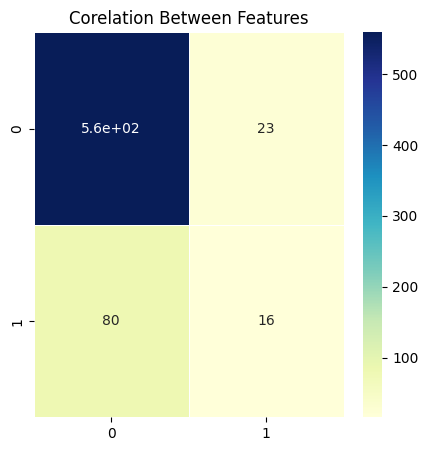

In [101]:
conf_mat = confusion_matrix(y_test, test_preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

####AdaBoost Classification

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.grid_search import GridSearchCV

param_grid_adb = {
    'n_estimators': [20, 50, 70, 100],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators' : [100, 200, 300, 400, 500]
             }


#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)

adb = AdaBoostClassifier()

# run grid search
adaboost_cv = GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)
adaboost_cv.fit(X_train, y_train)
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(adaboost_cv.best_params_))
print("Best score is {}".format(adaboost_cv.best_score_))

Tuned Decision Tree Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Best score is 0.8517678878446244


In [103]:
adb_pred = adaboost_cv.predict(X_test)
print(classification_report(y_test,adb_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8631    0.9966    0.9250       582
         1.0     0.6667    0.0417    0.0784        96

    accuracy                         0.8614       678
   macro avg     0.7649    0.5191    0.5017       678
weighted avg     0.8353    0.8614    0.8052       678



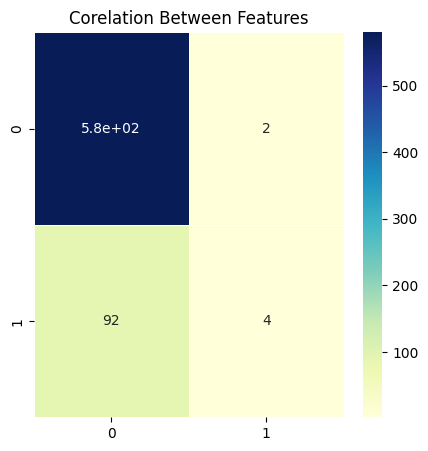

In [104]:
conf_mat = confusion_matrix(y_test, adb_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

AdaBoost, short for Adaptive Boosting, is an ensemble machine learning algorithm used for binary classification tasks. It is one of the most popular boosting algorithms and is known for its ability to improve the performance of weak learners (weak classifiers) by combining them into a strong learner (strong classifier).

Adaboost can be summarized into weak learner selection, weighted training data, trainging weak learners, update the weights, ensemble combination and final prediction

####Naive Bayes Classifier

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [106]:
y_pred = gnb.predict(X_test)

In [107]:
from sklearn import metrics
print('Gaussian Naive Bayes model accuracy:', metrics.accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Gaussian Naive Bayes model accuracy: 82.89085545722715
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.90       582
         1.0       0.27      0.12      0.17        96

    accuracy                           0.83       678
   macro avg       0.57      0.54      0.54       678
weighted avg       0.78      0.83      0.80       678



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Naive Bayes Classifier is a probabilistic machine learning algorithm used for classification tasks. It is based on Bayes theorem and is known for its simplicity, efficiency, and effectiveness, especially when dealing with high-dimensional datasets. Despite its "naive" assumption of feature independence, it often performs surprisingly well in various text classification and document categorization tasks.


Bayes theorem is a fundamental concept in probability theory, which describes how to update the probability of a hypothesis (class label) based on new evidence (features).

The Naive Bayes Classifier calculates the probability of an instance belonging to a specific class based on the observed feature values. The class with the highest probability is then assigned as the predicted class label for the given instance.

####Hyperparameter Tunning Naive Bayes

In [108]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [109]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(X_test, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


In [110]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [111]:
gs_NB.best_score_

0.8397167755991287

In [112]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8480825958702065


In [113]:
print(classification_report(y_test,predict_test,digits=4))

              precision    recall  f1-score   support

         0.0     0.8668    0.9725    0.9166       582
         1.0     0.3600    0.0938    0.1488        96

    accuracy                         0.8481       678
   macro avg     0.6134    0.5331    0.5327       678
weighted avg     0.7950    0.8481    0.8079       678



#### SVM(Support Vector Machine)


In [114]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
svm = SVC()
svm_cv = GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)

# fitting the model for grid search
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [115]:
svm_pred = svm_cv.predict(X_test)
print(classification_report(y_test,svm_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8632    0.9863    0.9206       582
         1.0     0.3846    0.0521    0.0917        96

    accuracy                         0.8540       678
   macro avg     0.6239    0.5192    0.5062       678
weighted avg     0.7954    0.8540    0.8032       678



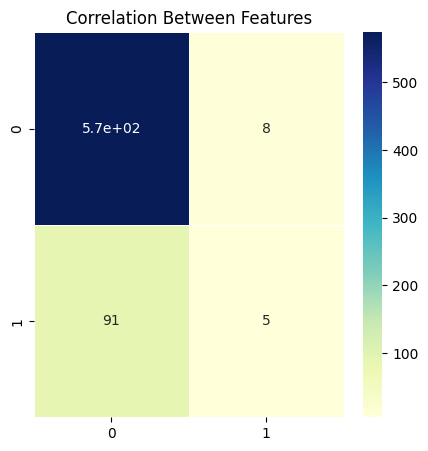

In [116]:
conf_mat = confusion_matrix(y_test, svm_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Correlation Between Features')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


SVM stands for Support Vector Machine, and it is a powerful and widely used supervised machine learning algorithm for classification and regression tasks. SVM is particularly effective in solving binary classification problems, where the goal is to separate data into two classes, but it can be extended to handle multi-class classification as well. SVM is based on the concept of finding an optimal hyperplane that best separates the data points belonging to different classes.

The training process of SVM involves finding the hyperplane that best separates the data while taking into account the soft margin and using support vectors. Once the optimal hyperplane is obtained, new data points can be classified by determining which side of the hyperplane they lie on.

SVM is known for its ability to handle high-dimensional data, its robustness against overfitting, and its effectiveness in capturing complex decision boundaries.

#### KNN (K- Nearest Neighbour)

In [117]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)


    # print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.87905605 0.88126844 0.85840708 0.8609882  0.85176991
 0.85140118 0.85250737 0.85140118 0.85250737]
Test Accuracy:  [0.75958702 0.84365782 0.82153392 0.84955752 0.83185841 0.85250737
 0.84365782 0.85840708 0.84513274 0.85103245]


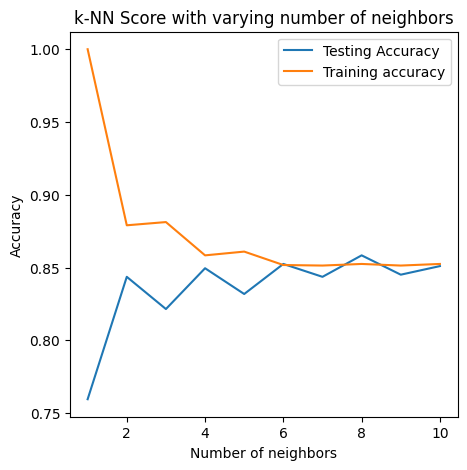

In [118]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

KNN stands for K-Nearest Neighbors, and it is a popular and simple machine learning algorithm used for both classification and regression tasks. It is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution. KNN is often used for pattern recognition and data mining tasks, and it is considered an instance-based learning or lazy learning algorithm.

In KNN, the idea is to classify a new data point (or predict its value in regression) by looking at the class labels (or target values) of its K nearest neighbors in the training dataset. The term "K" in KNN represents the number of neighbors to consider when making predictions. K is a hyperparameter, and its value is typically chosen based on cross-validation or other tuning methods.

#### Hyper Parameter Tuning - KNN

Let's try to find best parameter for knn.

In [119]:
param_grid = {'n_neighbors':np.arange(1,100)}

In [120]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [121]:
knn_cv.best_score_

0.8488192561483625

In [122]:
knn_cv.best_params_

{'n_neighbors': 25}

In [123]:
# predictions
knn_predict = knn_cv.predict(X_test)

print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       582
         1.0       0.25      0.03      0.06        96

    accuracy                           0.85       678
   macro avg       0.56      0.51      0.49       678
weighted avg       0.77      0.85      0.80       678



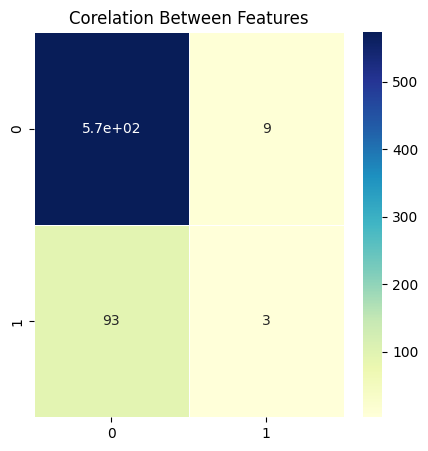

In [124]:
conf_mat = confusion_matrix(y_test, knn_predict)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(conf_mat, annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features')
plt.show()

### Evaluation Metric after hyper parameter tuning

In [125]:
models = [['Adaboost', AdaBoostClassifier(random_state=42)],
          ['Adaboost after Hyperparameter Tuning',GridSearchCV(adb, param_grid=param_grid_adb, cv = 5)],
          ['Decision Tree', DecisionTreeClassifier()],
          ['Decision Tree after Hyperparameter Tuning',GridSearchCV(tree, param_dist, cv = 5)],
          ['KNN', KNeighborsClassifier(n_neighbors=79)],
          ['KNN after Hyperparameter tuning ', KNeighborsClassifier(n_neighbors=5)],
          ['Logistic Regression', LogisticRegression(solver='liblinear')],
          ['Logistic Regression after Hyperparameter Tuning',GridSearchCV(logreg, grid,cv = 5)],
          ['Naive Bayes', GaussianNB()],
          ['Naive Bayes after Hyperparameter tuning',
           GridSearchCV(estimator=gnb,
                        param_grid=params_NB,
                        cv=cv_method,
                        verbose=1,
                        scoring='accuracy')],
          ['SVM', SVC(random_state=6)],
          ['SVM after Hyperparameter Tuning',GridSearchCV(svm, param_grid_svm, refit = True, verbose = 3)]
          ]

In [126]:
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,recall_score,accuracy_score,precision_score
model_1_data = []
for name,model in models :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    conf_mat = confusion_matrix(y_test, predicted)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    train_y_predicted = model.predict(X_train)
    test_y_predicted = model.predict(X_test)
    model_data['Train_accuracy'] = accuracy_score(y_train,train_y_predicted)
    model_data['Test_accuracy'] = accuracy_score(y_test,test_y_predicted)
    #model_data["Accuracy"] = accuracy_score(y_test,predicted)
    model_data['Precision'] = true_positive/(true_positive+false_positive)
    model_data['Recall']= true_positive/(true_positive+false_negative)
    model_data['F1_Score'] = 2*(model_data['Recall'] * model_data['Precision']) / (model_data['Recall'] + model_data['Precision'])
    model_1_data.append(model_data)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.847 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.847 t

In [127]:
model_2_data = pd.DataFrame(model_1_data)
# model_1_data = model_1_data.sort_values('train_accuracy',ascending=False)
model_2_data

Name  Train_accuracy  \
0                                          Adaboost        0.858038   
1              Adaboost after Hyperparameter Tuning        0.853982   
2                                     Decision Tree        1.000000   
3         Decision Tree after Hyperparameter Tuning        0.882743   
4                                               KNN        0.846976   
5                  KNN after Hyperparameter tuning         0.860988   
6                               Logistic Regression        0.851770   
7   Logistic Regression after Hyperparameter Tuning        0.852876   
8                                       Naive Bayes        0.830015   
9           Naive Bayes after Hyperparameter tuning        0.834071   
10                                              SVM        0.856932   
11                  SVM after Hyperparameter Tuning        0.856195   

    Test_accuracy  Precision    Recall  F1_Score  
0        0.852507   0.979381  0.866261  0.919355  
1        0.861357   0.996564  0.863095  0.925040  
2        0.768437   0.855670  0.872154  0.863833  
3        0.840708   0.946735  0.877389  0.910744  
4        0.858407   1.000000  0.858407  0.923810  
5        0.831858   0.953608  0.864486  0.906863  
6        0.855457   0.984536  0.865559  0.921222  
7        0.859882   0.989691  0.866165  0.923817  
8        0.828909   0.945017  0.867508  0.904605  
9        0.831858   0.948454  0.867925  0.906404  
10       0.856932   0.993127  0.861401  0.922586  
11       0.853982   0.986254  0.863158  0.920609

# **Conclusion**

In conclusion, this project demonstrated the potential of machine learning techniques to accurately predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study. Key points from this project include:

* The major people who are having Cardiovascular Risk(CVR) are at the age of 50-70.
* Even though many people have a normal range of BMI, the people who are having high BMI, they are at risk of CVR
* In glucose level, we can see some outliers in both kinds of people(who are at risk and not at risk). But the people who got high glucose levels are coming into the category of CVR. So we can conclude that it's even one of the factors which may contribute to CVR.
* If people are already having diabetes and if they have high BMI then they are at high risk of CVR.
* Even if they had diabetes or not, they are at the same level of risk of CVR. But it's high between the age group 50-70.

* Careful data preprocessing and transformation improved the performance of machine learning models and enabled more accurate predictions.

* Feature selection was important for identifying the most relevant predictors of CHD risk.
* Techniques such as SMOTE combined with Tomek links undersampling and standard scalar scaling were used to handle imbalanced data and improve model performance.
* The Adda boost(tuned) was chosen as the final prediction model due to its high precision and recall score.
* This project provides a valuable example of how machine learning techniques can be applied to real-world problems to achieve positive business impact.

